### Mall Customers Segmentation
Customers who come for shopping in a mall can be grouped in a number of ways. Shopping pattern,spending pattern, shopping score, salary etc are some of the factors that can be used to divide the 
customers into different categories.

The reason for these clusters is to help identify those customers who would be interested in certain 
products, offers and services. The store may strategize its offerings in such a way that it targets only 
right customers for specific products. This helps in creating a win-win situation for both the store (in 
terms of revenue and more customers through customer recommendation) and the customer 
(discounts, offers, reward points, gifts, etc).

### Business Objective
To create Customer cluster to identify the different types of customers 


### Importing librabries

In [1]:
# pandas and numpy
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.cluster.hierarchy as sch # for cleating dendogram

# warnings
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder                 # converting categorical to numerical
from sklearn.preprocessing import MinMaxScaler, StandardScaler # to normalize and standadize the data

# Models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering,DBSCAN

# Metrics
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# PCA
from sklearn.decomposition import PCA

### Reading the data

In [2]:
df=pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [3]:
df.shape

(200, 5)

**Info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Describe**

In [5]:
df.describe().T

count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0

**Data Types**

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

**Null Values**

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values in the data.

### EDA

**Distribution of Numerical columns**

**Histogram for all the numerical columns**

In [8]:
sb.set(style="darkgrid")

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**Distribution**

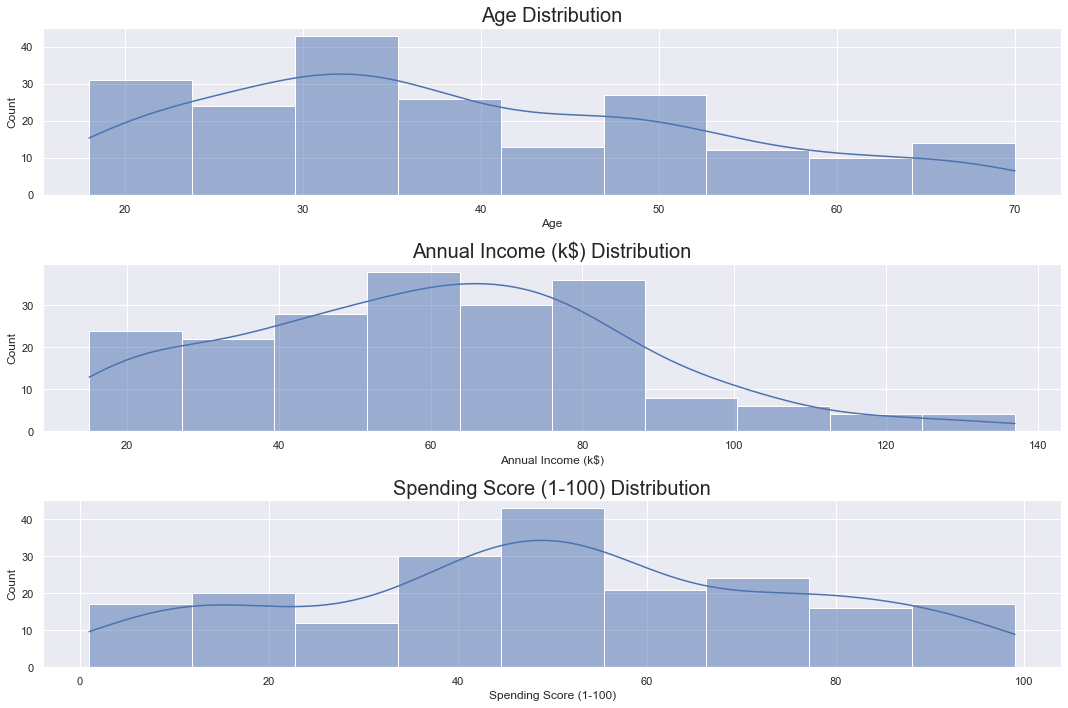

In [9]:
plt.figure(figsize = (15,10))
z=1
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for col in columns:
    plt.subplot(3,1,z)
    sb.histplot(x = df[col],kde=True)
    plt.title(f'{col} Distribution',fontsize=20)
    z=z+1

plt.tight_layout()
plt.show()

##### Interpretation :
* The above graphs show the distribibution of numerical columns.
* Age has right skewed data.
* Annual Income and spending Score are almost normally distributed.


**Boxplot**

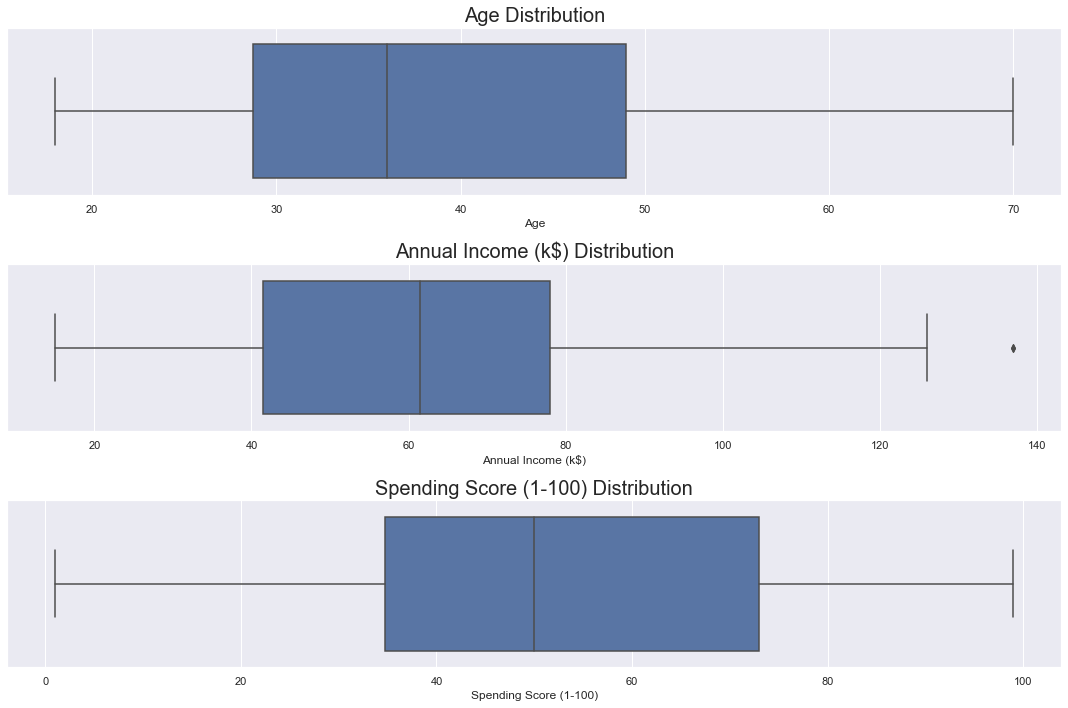

In [10]:
plt.figure(figsize = (15,10))
z=1
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for col in columns:
    plt.subplot(3,1,z)
    sb.boxplot(x = df[col])
    plt.title(f'{col} Distribution',fontsize=20)
    z=z+1

plt.tight_layout()
plt.show()

##### Interpretation :
* From the box plot we can see aga and annual income are right skewed.
* Spending score has more spread in their data.
* We cant find any outliers in the data.

**Gender**

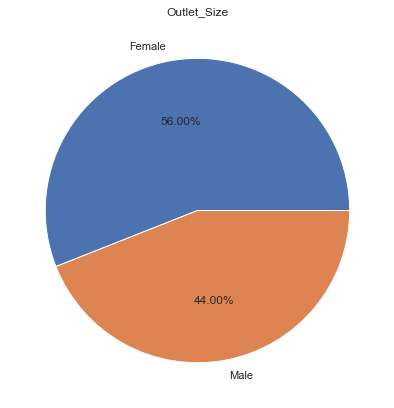

In [11]:
pie = df['Gender'].value_counts()
plt.figure(figsize=(15,7))
plt.pie(pie.values,labels=pie.index,autopct='%.2f%%')
plt.title('Outlet_Size')
plt.show()

##### Interpretation :
* We can see than there are more number of female counts in the given data.

**Gender vs Spending score**

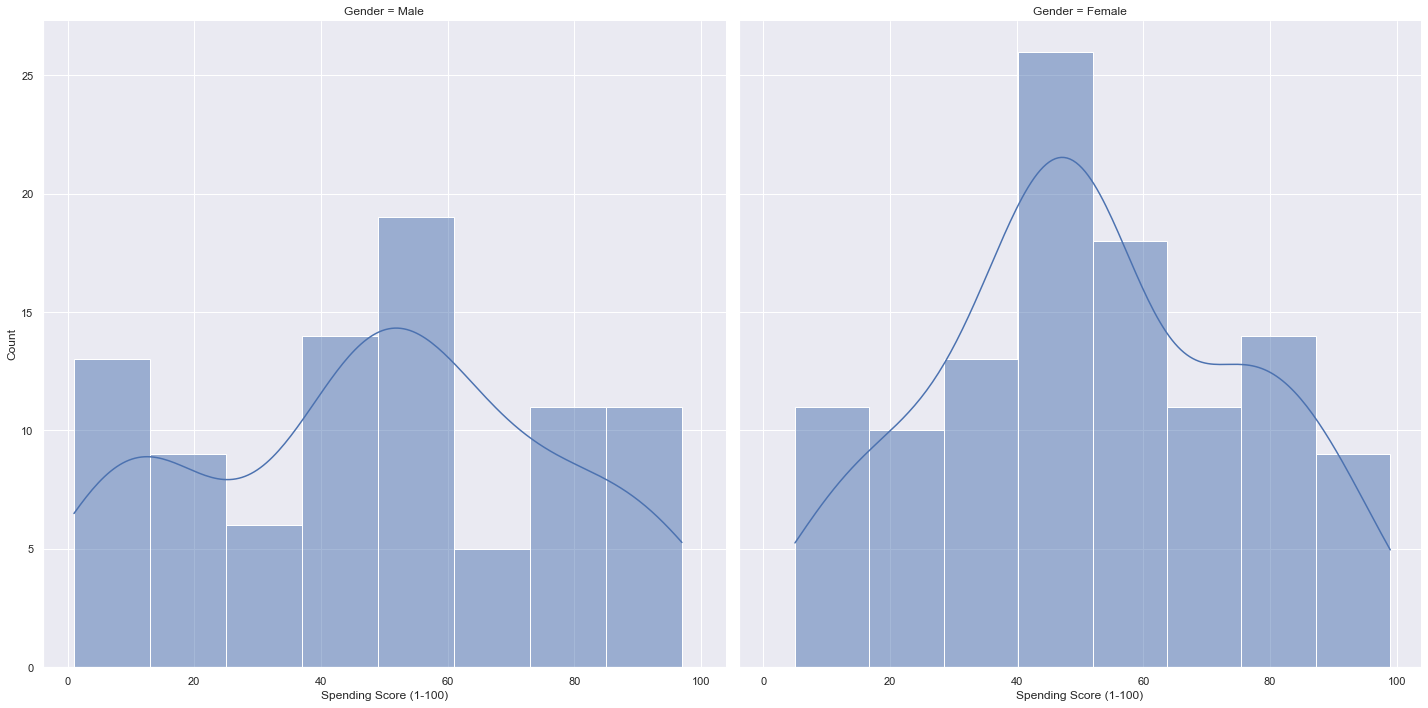

In [21]:
a=sb.FacetGrid(df,col='Gender',height=10)
a.map(sb.histplot,'Spending Score (1-100)',kde=True)
plt.show()

##### Interpretation :
* At the spending score range 40-60 we can find many people in both gender.
* There are more number of female in the range 40-60.
* There are more number of male in the range 0-10.

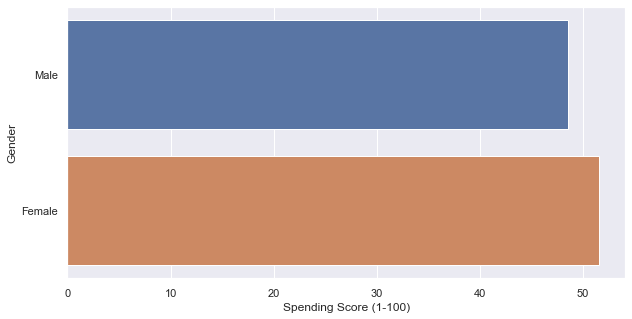

In [29]:
plt.figure(figsize=(10,5))
sb.barplot(x=df['Spending Score (1-100)'],y=df['Gender'],ci=None)
plt.show()

##### Interpretation :
* Female has more spending scores than compared to male.

**Gender vs Annual Income**

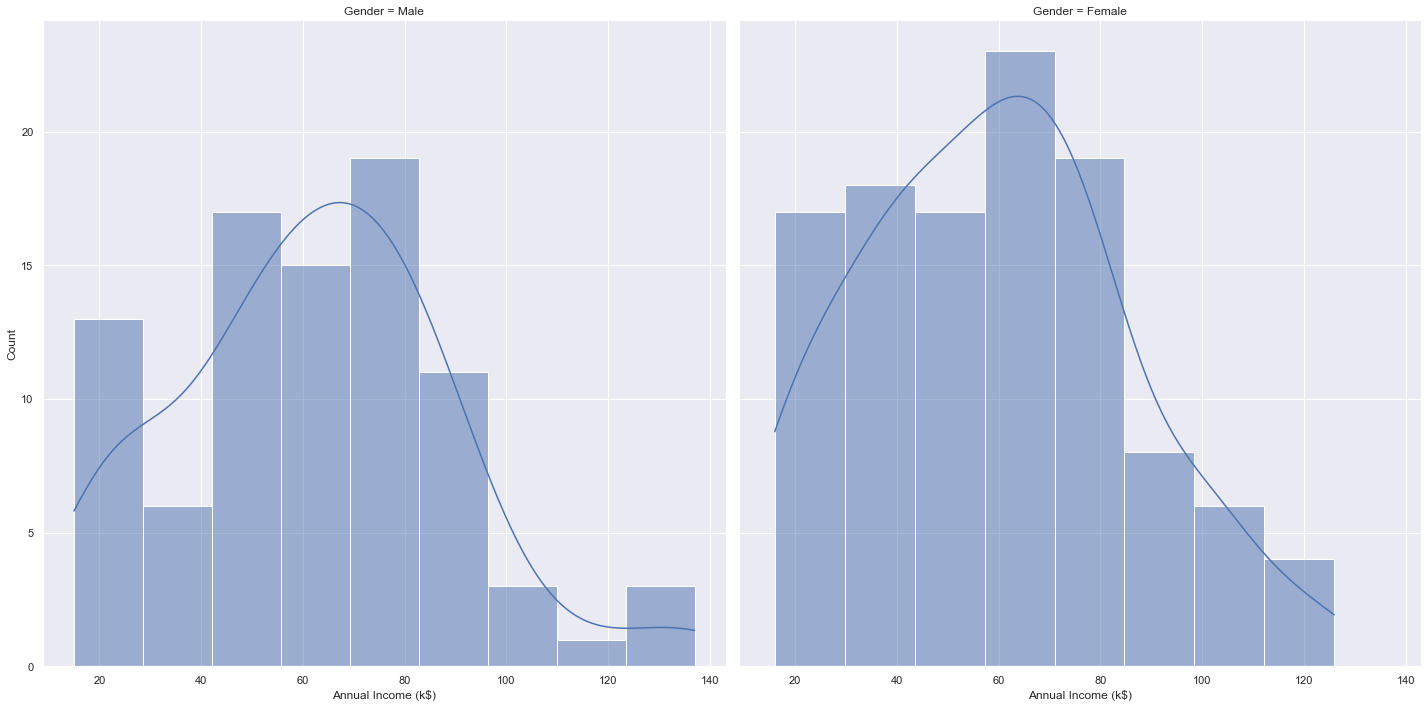

In [16]:
a=sb.FacetGrid(df,col='Gender',height=10)
a.map(sb.histplot,'Annual Income (k$)',kde=True)
plt.show()

##### Interpretation :
* The datas are right skewed.
* From the graph we can see that range of female annual income is 20-80 and there are more people in their range.
* Annual income range for Male is 40-80.

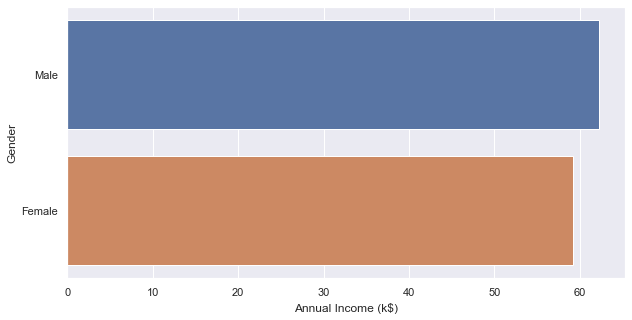

In [30]:
plt.figure(figsize=(10,5))
sb.barplot(x=df['Annual Income (k$)'],y=df['Gender'],ci=None)
plt.show()

**Gender vs Age**

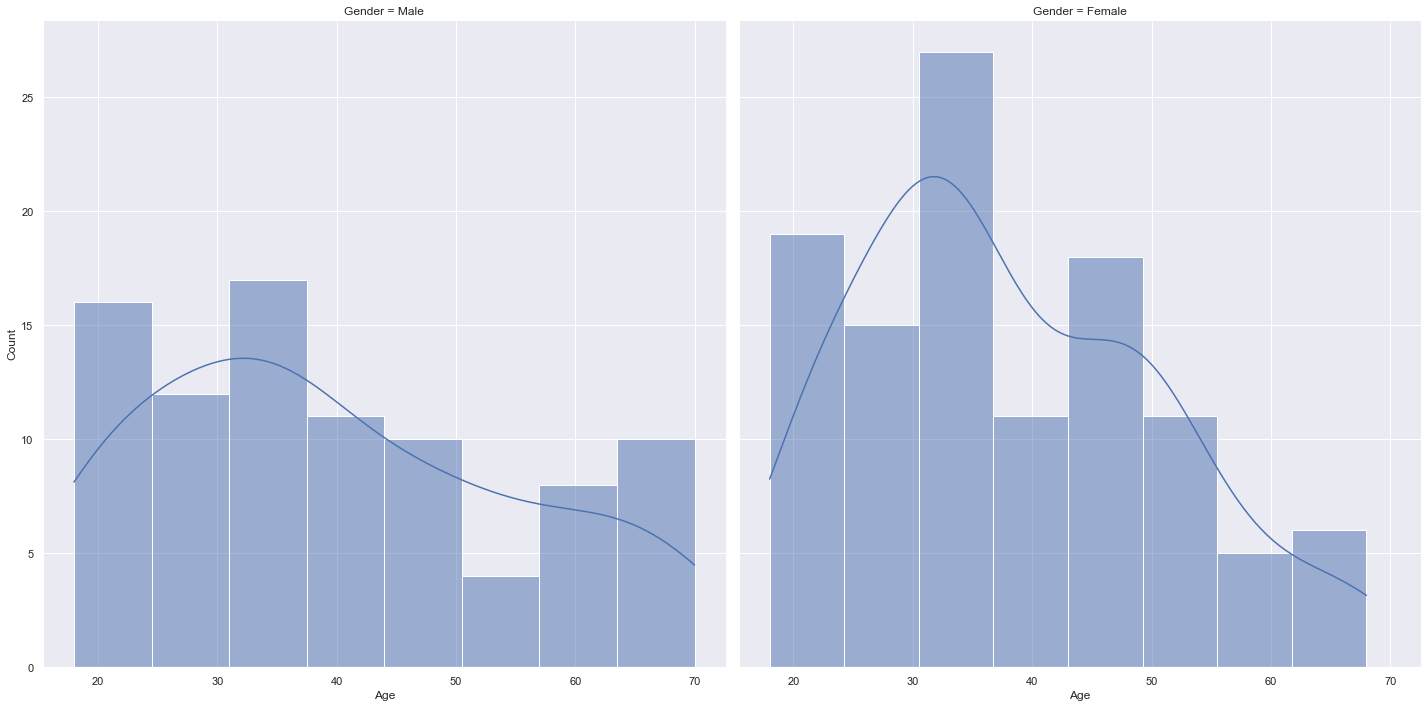

In [17]:
a=sb.FacetGrid(df,col='Gender',height=10)
a.map(sb.histplot,'Age',kde=True)
plt.show()

##### Interpretation :
* At Female we can able to find more number of people in the range 30-40. There are more number of female than male .
* At male more number of persons are present in the range 20-40.

**Pair plot**

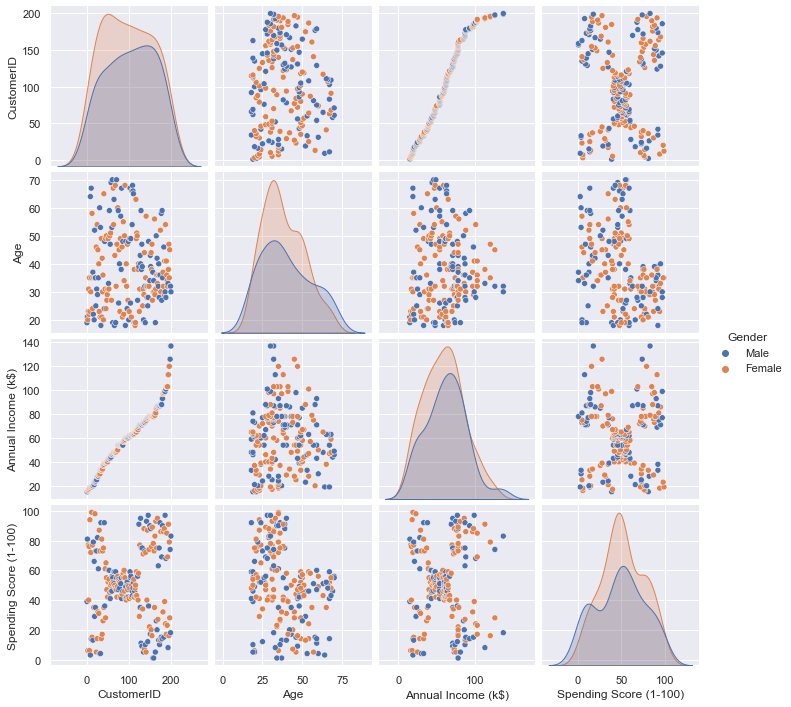

In [32]:
sb.pairplot(df,hue='Gender')
plt.show()

**Age vs Annual Income**

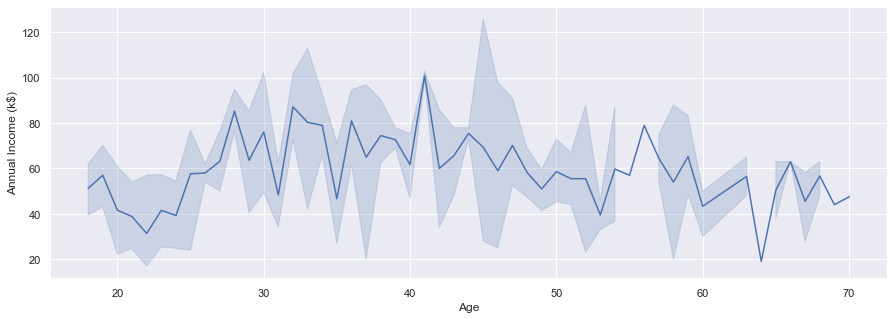

In [28]:
plt.figure(figsize=(15,5))
sb.lineplot(x='Age',y='Annual Income (k$)',data=df)
plt.show()

##### Interpretation :
* This graph shows not that much trend but we can see that age 55 the Annual income was decreased.

##### Data Preprocessing

In [10]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

##### Converting objects into category

In [11]:
df['Gender'] = df['Gender'].astype('category')

In [12]:
df_1=df.copy()

##### Category to numeric

In [13]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()
df_1['Gender']= label_encoder.fit_transform(df_1['Gender'])

##### Correlation :

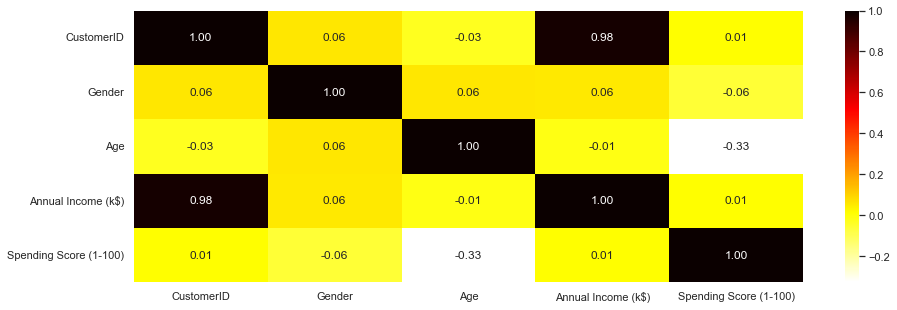

In [14]:
corr=df_1.corr()
plt.figure(figsize=(15,5))
sb.heatmap(corr,annot=True,fmt='.2f',cmap='hot_r')
plt.show()

##### Interpretation :
* Each columns are weakly correlated with each other.
* Spending score and age are negatively correlated with each other.

##### Droping the columns

In [15]:
df_1.drop(columns=['CustomerID','Gender'],inplace=True)

##### Data Scaling

In [16]:
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_df = df_1.select_dtypes(include=numerics)
    if scale == 'minmax':
        scaler = MinMaxScaler() # normalize
    else:
        scaler = StandardScaler() # standard
    df_scaled = pd.DataFrame(scaler.fit_transform(df_1.to_numpy()),columns=new_df.columns)
    return df_scaled

In [17]:
scale = 'minmax' #normalize
data_scaled=feature_scale(scale)
data_scaled

Age  Annual Income (k$)  Spending Score (1-100)
0    0.019231            0.000000                0.387755
1    0.057692            0.000000                0.816327
2    0.038462            0.008197                0.051020
3    0.096154            0.008197                0.775510
4    0.250000            0.016393                0.397959
..        ...                 ...                     ...
195  0.326923            0.860656                0.795918
196  0.519231            0.909836                0.275510
197  0.269231            0.909836                0.744898
198  0.269231            1.000000                0.173469
199  0.230769            1.000000                0.836735

[200 rows x 3 columns]

In [33]:
X=data_scaled.copy()

### 1.KMeans Clustering

**Error and Performance**


In [19]:
def Kmeans_clusters(data):
    distorsions = []
    silhouette = []
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        distorsions.append(kmeans.inertia_)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette.append(silhouette_avg)
        print("For n_clusters =",k,"The average silhouette_score is :", silhouette_avg)


    fig,ax = plt.subplots(figsize=(20, 8))

    plt.subplot(121)
    plt.plot(range(2,15), distorsions, linestyle='dashed', marker='o', markersize=10)
    plt.grid(True)
    plt.xlabel('K')
    plt.ylabel('Distorsions')
    plt.title('Elbow curve'); 

    plt.subplot(122)
    plt.plot(range(2,15),silhouette, linestyle='dashed', marker='o', markersize=10)
    plt.title('Score vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Score')

    plt.tight_layout()
    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3652498066402899
For n_clusters = 3 The average silhouette_score is : 0.36504262943838
For n_clusters = 4 The average silhouette_score is : 0.392319202055722
For n_clusters = 5 The average silhouette_score is : 0.40611743307078185
For n_clusters = 6 The average silhouette_score is : 0.4234860620777653
For n_clusters = 7 The average silhouette_score is : 0.42493242141407167
For n_clusters = 8 The average silhouette_score is : 0.41429858533305536
For n_clusters = 9 The average silhouette_score is : 0.42916569440716645
For n_clusters = 10 The average silhouette_score is : 0.4070146649311485
For n_clusters = 11 The average silhouette_score is : 0.4107709888330669
For n_clusters = 12 The average silhouette_score is : 0.376326032411858
For n_clusters = 13 The average silhouette_score is : 0.37815817976144245
For n_clusters = 14 The average silhouette_score is : 0.3723285222141729


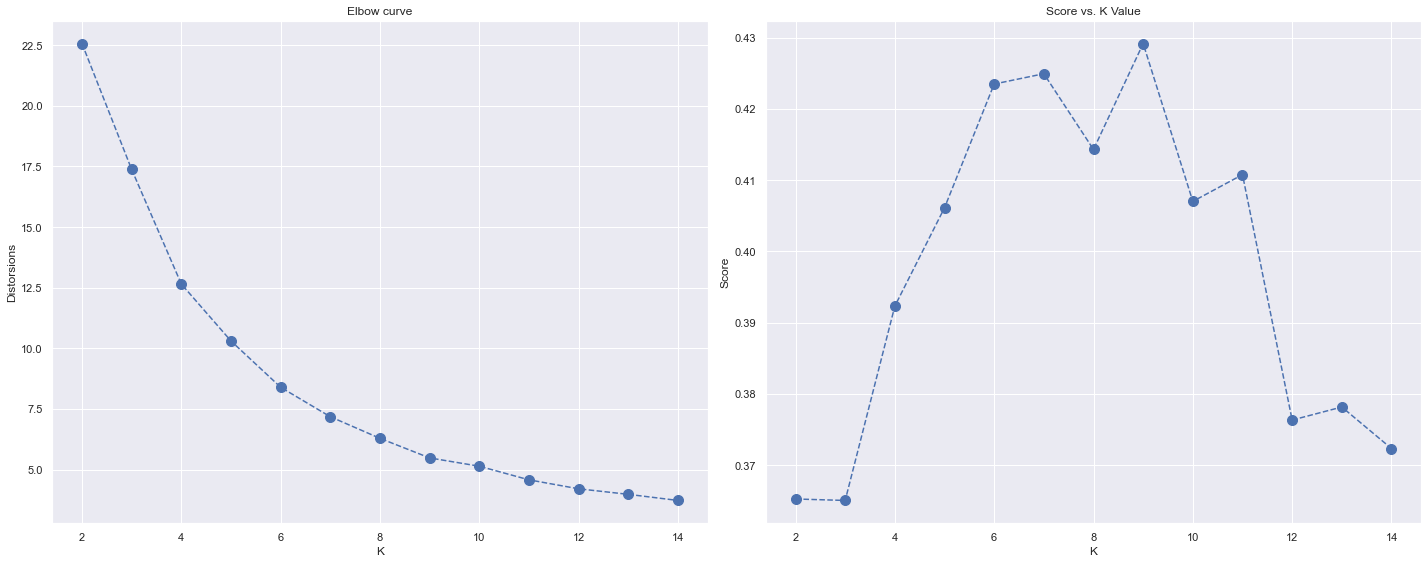

In [20]:
kmeans_best = Kmeans_clusters(X)
kmeans_best

##### Interpretation :
* By seeing the elbow methods of error and performance we can select the number of clusters.
* At 5,6,7 we are getting good results.

In [21]:
def kmean_viz(X):
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.cm as cm
    import numpy as np
    range_n_clusters = [2, 3, 4, 5, 6]
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            facecolor=color, edgecolor=color, alpha=0.7)
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10 # 10 for the 0 samples
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([]) # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3652498066402899


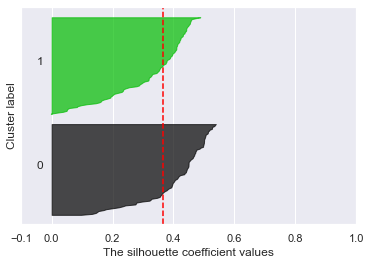

For n_clusters = 3 The average silhouette_score is : 0.36504262943838


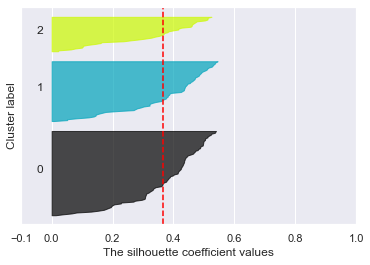

For n_clusters = 4 The average silhouette_score is : 0.392319202055722


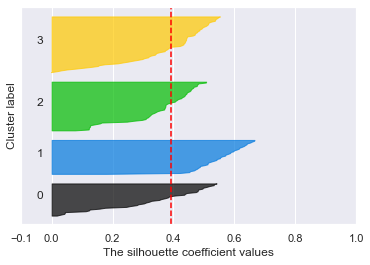

For n_clusters = 5 The average silhouette_score is : 0.40611743307078185


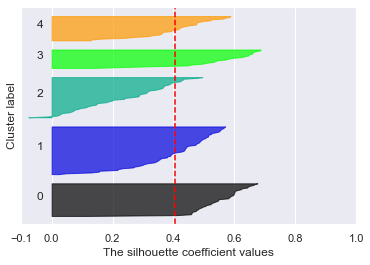

For n_clusters = 6 The average silhouette_score is : 0.42249922234740717


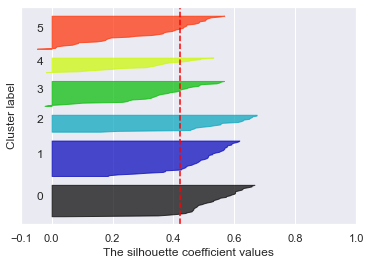

In [22]:
kmean_viz(X)

**Building the best model**

In [23]:
# building and training the model
Kmeans = KMeans(n_clusters=5)
kmeans_model = Kmeans.fit(X)

In [24]:
kmeans_label = kmeans_model.labels_
kmeans_label

array([4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2, 1, 2, 4, 2,
       1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       1, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 0, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 4, 0, 3, 0, 4, 0, 3, 0, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [65]:
kmeans_silhouette_avg = silhouette_score(X, kmeans_label)
kmeans_silhouette_avg

0.40611743307078185

In [25]:
kmean_pred = X.copy()
kmean_pred['Kmeans_Labels']=kmeans_label
kmean_pred

Age  Annual Income (k$)  Spending Score (1-100)  Kmeans_Labels
0    0.019231            0.000000                0.387755              4
1    0.057692            0.000000                0.816327              2
2    0.038462            0.008197                0.051020              4
3    0.096154            0.008197                0.775510              2
4    0.250000            0.016393                0.397959              4
..        ...                 ...                     ...            ...
195  0.326923            0.860656                0.795918              0
196  0.519231            0.909836                0.275510              3
197  0.269231            0.909836                0.744898              0
198  0.269231            1.000000                0.173469              3
199  0.230769            1.000000                0.836735              0

[200 rows x 4 columns]

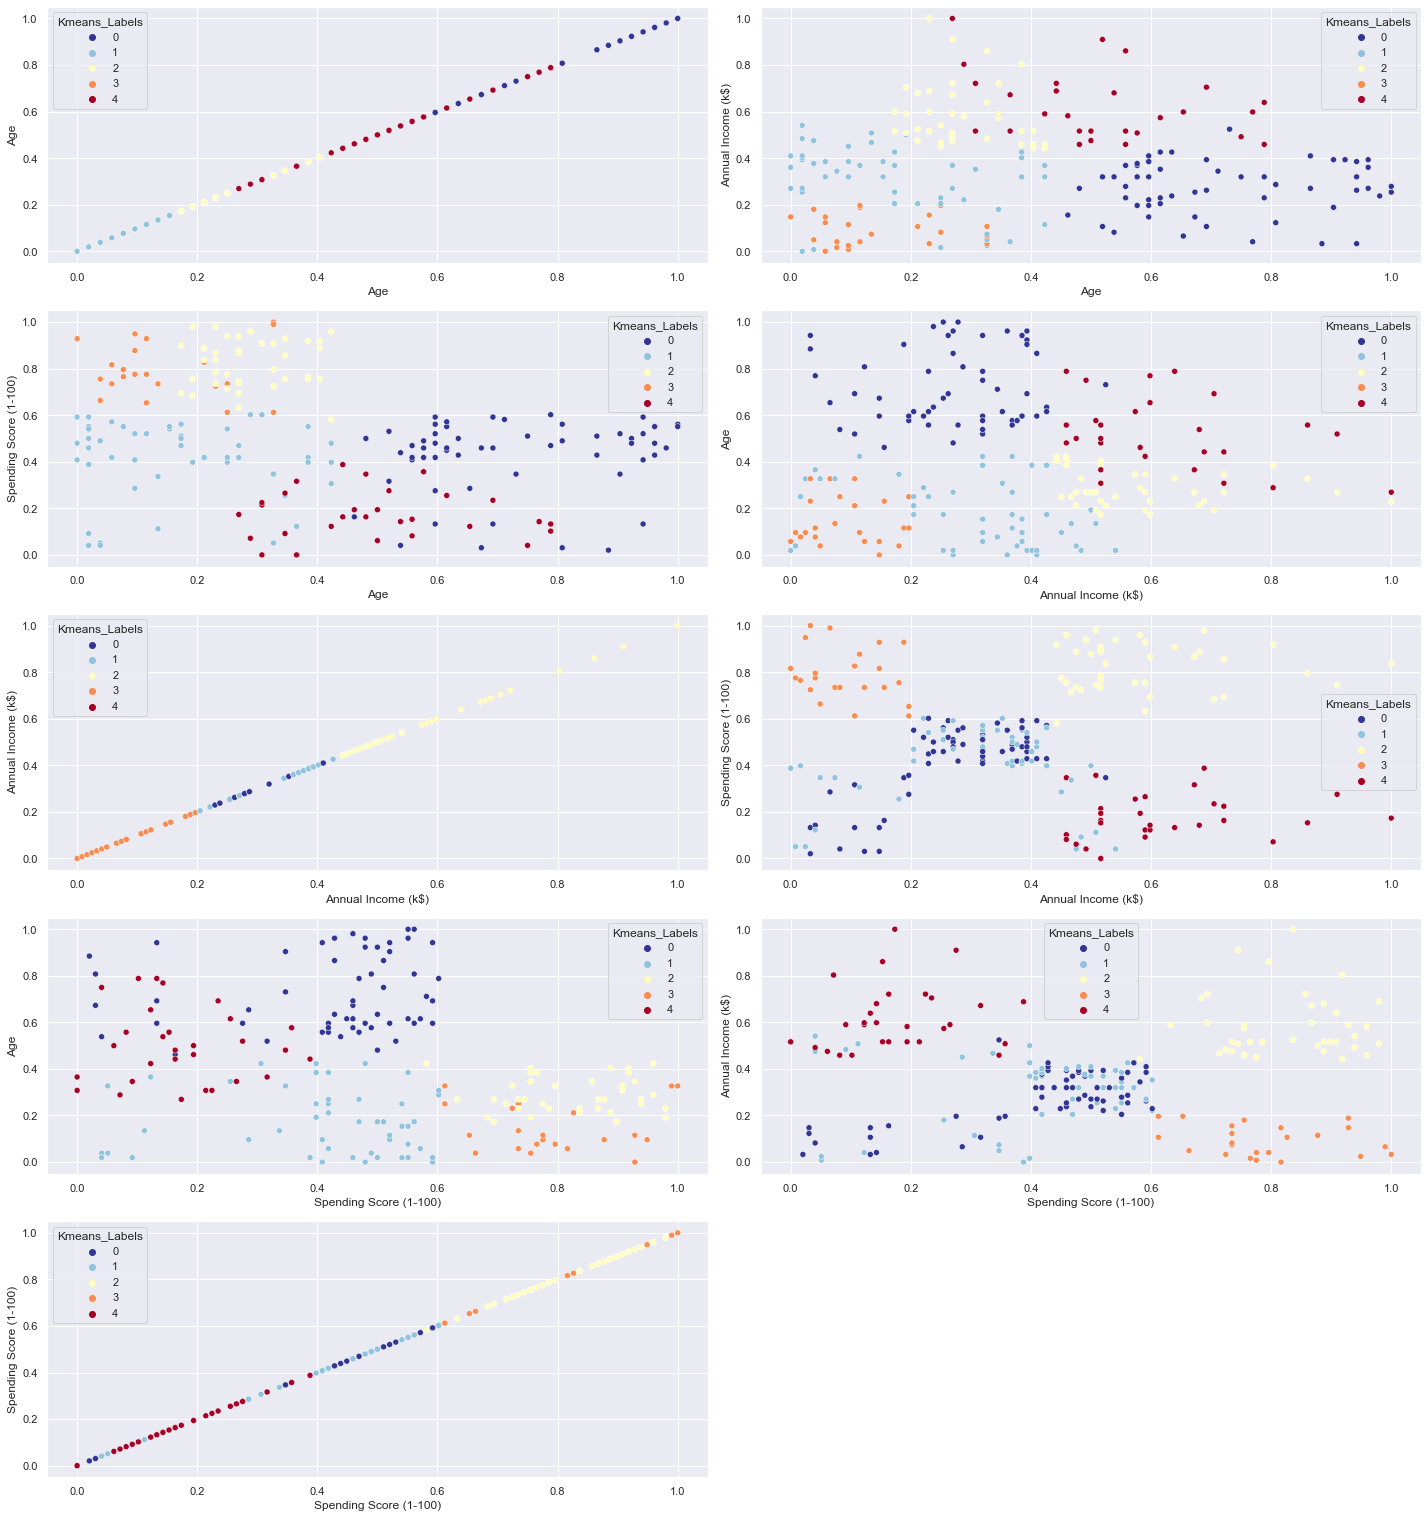

In [147]:
fig,ax = plt.subplots(figsize=(20, 25))
z=1
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    for j in columns:
        plt.subplot(6,2,z)
        sb.scatterplot(x = kmean_pred[i],y=kmean_pred[j],hue=kmean_pred['Kmeans_Labels'],palette='RdYlBu_r')   
        z=z+1

plt.tight_layout()
plt.show()

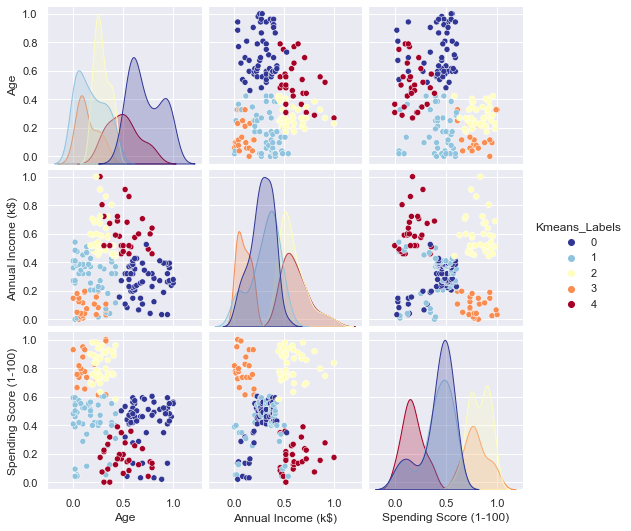

In [92]:
sb.pairplot(kmean_pred,hue='Kmeans_Labels',palette='RdYlBu_r')
plt.show()

### 2.Heirarchical Clustering

In [26]:
linkages = ['single','average','complete','ward']

In [27]:
def dendo(X):
    f,ax = plt.subplots(figsize = (20,20))
    z = 1
    for i in linkages:
        plt.subplot(2,2,z)
        dendrograms = sch.dendrogram(sch.linkage(X,method = i))
        plt.title(f'{i}',fontsize=30)
        plt.ylabel('Euclidean distance', fontsize=20)
        plt.xlabel('X',fontsize=20)
        z = z+1

    plt.tight_layout()
    plt.show()

**Dendrograms**

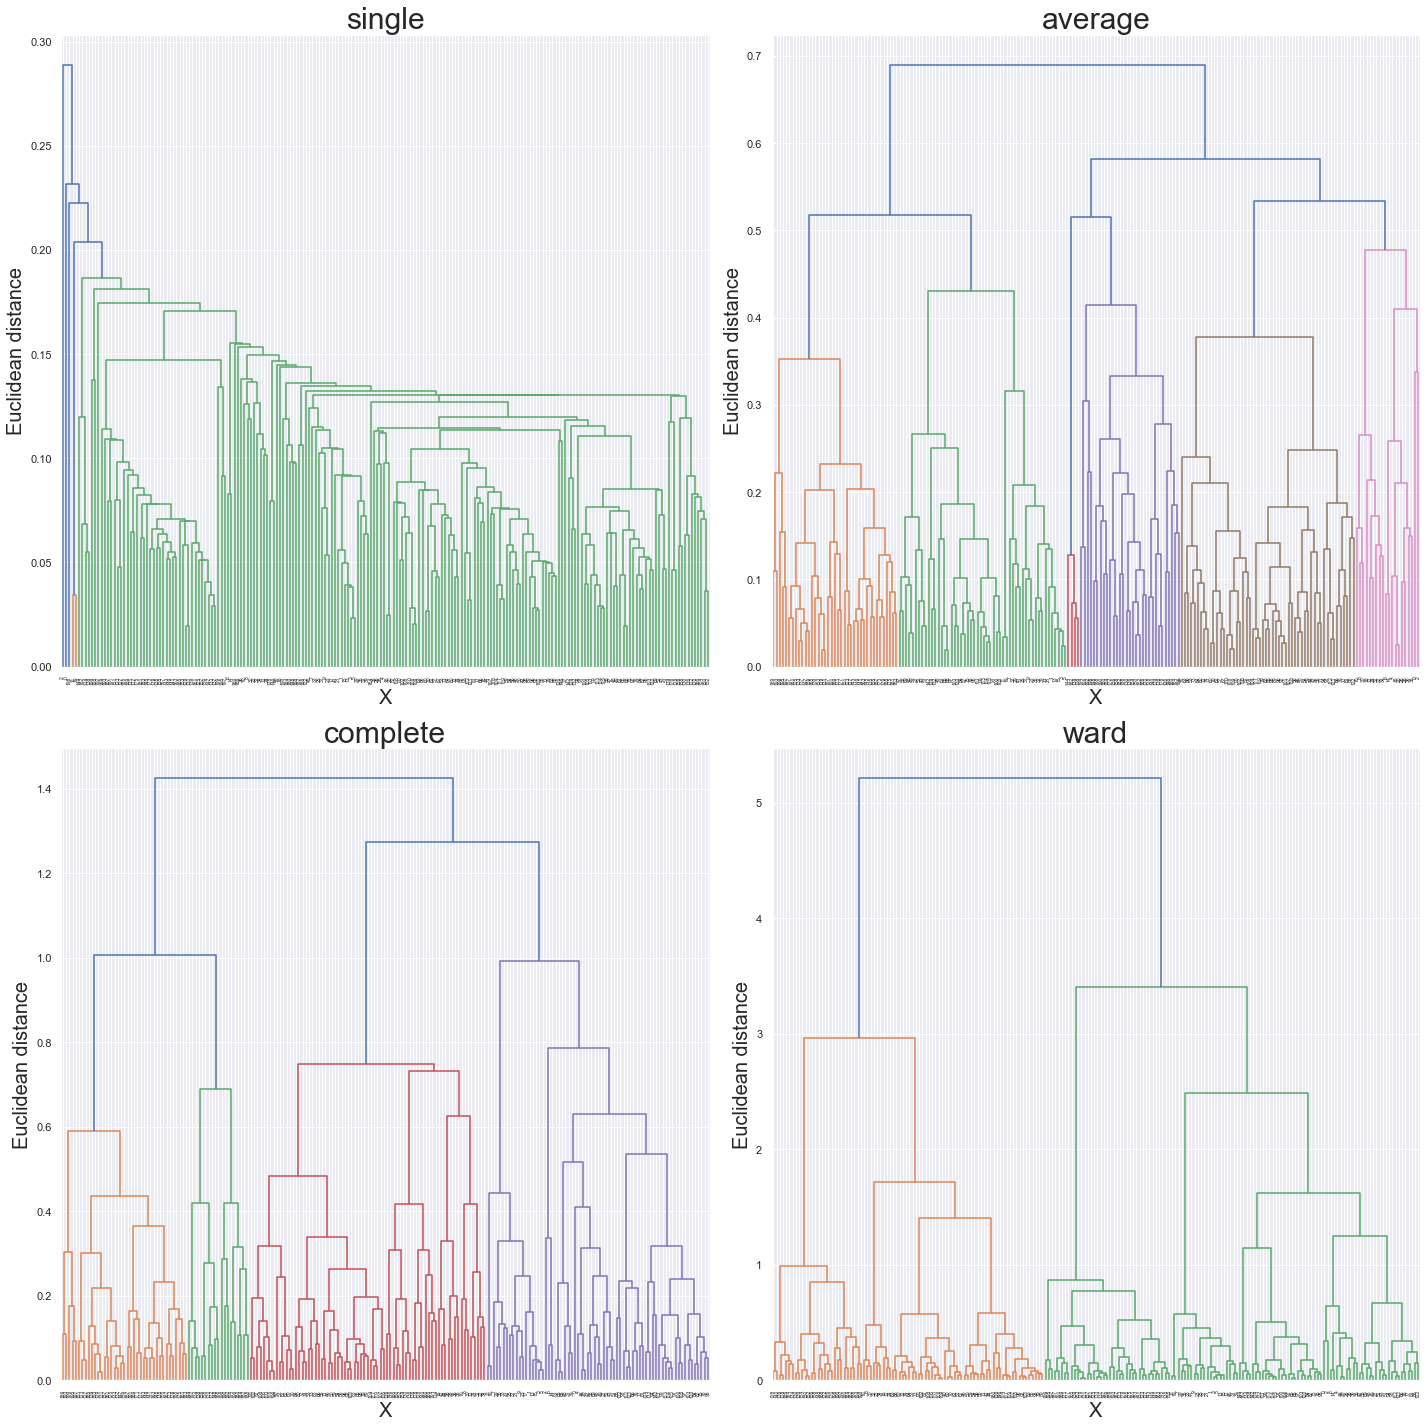

In [28]:
dendo(X)

##### Interpretation :
* From dendrogram ,By bisecting the best long line we are cluster=5.

In [35]:
X1 = np.array(X)

In [36]:
def heirarchial_clustering(data,cluster):
    linkages = ['single','average','complete','ward']
    prediction = []
    for i in linkages:
        Agglomerative = AgglomerativeClustering(n_clusters=cluster,linkage = i,affinity = 'euclidean')
        Agglomerative_pred = Agglomerative.fit_predict(data)
        print(f'{i} Silhouette Score : {silhouette_score(X, Agglomerative_pred)}')
        prediction.append(Agglomerative_pred)
               
    pred = pd.DataFrame({'Single':prediction[0],
                         'Average':prediction[1],
                         'Complete':prediction[2],
                         'Ward':prediction[3]})
    
    return(pred)

In [37]:
heirarchial = heirarchial_clustering(X1,5)
heirarchial

single Silhouette Score : -0.05044117673605642
average Silhouette Score : 0.3982883494848387
complete Silhouette Score : 0.3614137523023876
ward Silhouette Score : 0.3955454334726547


Single  Average  Complete  Ward
0         2        1         0     1
1         0        2         4     4
2         3        1         0     1
3         0        2         4     4
4         0        1         0     1
..      ...      ...       ...   ...
195       0        4         3     2
196       0        0         1     3
197       0        4         3     2
198       4        0         1     3
199       0        4         3     2

[200 rows x 4 columns]

**Hierarchial predicted values**

In [38]:
heirarchial_pred = X.copy()
heirarchial_pred = pd.concat([heirarchial_pred,heirarchial],axis=1)
heirarchial_pred

Age  Annual Income (k$)  Spending Score (1-100)  Single  Average  \
0    0.019231            0.000000                0.387755       2        1   
1    0.057692            0.000000                0.816327       0        2   
2    0.038462            0.008197                0.051020       3        1   
3    0.096154            0.008197                0.775510       0        2   
4    0.250000            0.016393                0.397959       0        1   
..        ...                 ...                     ...     ...      ...   
195  0.326923            0.860656                0.795918       0        4   
196  0.519231            0.909836                0.275510       0        0   
197  0.269231            0.909836                0.744898       0        4   
198  0.269231            1.000000                0.173469       4        0   
199  0.230769            1.000000                0.836735       0        4   

     Complete  Ward  
0           0     1  
1           4     4  
2           0     1  
3           4     4  
4           0     1  
..        ...   ...  
195         3     2  
196         1     3  
197         3     2  
198         1     3  
199         3     2  

[200 rows x 7 columns]

**Single**

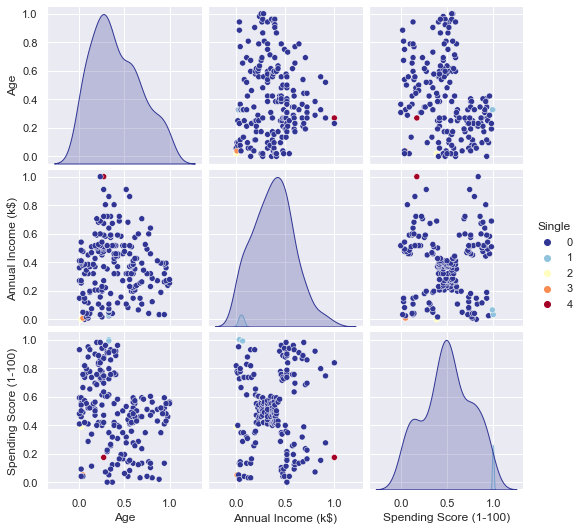

In [158]:
columns=heirarchial_pred[['Age', 'Annual Income (k$)','Spending Score (1-100)','Single']]
sb.pairplot(columns,hue='Single',palette='RdYlBu_r')
plt.show()

##### Interpretation :
* In Single we cant see much cluster formation everything are in same color.

**Average**

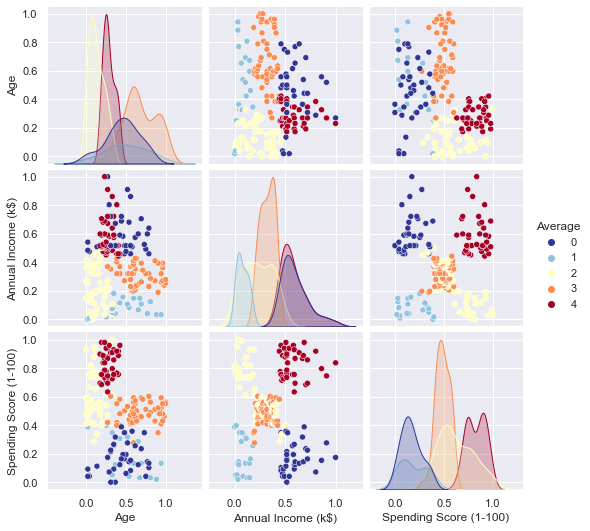

In [159]:
columns=heirarchial_pred[['Age', 'Annual Income (k$)','Spending Score (1-100)','Average']]
sb.pairplot(columns,hue='Average',palette='RdYlBu_r')
plt.show()

##### Interpretation :
* By using average we are getting good clusters than compared to single.
* The clusters are seperated nicely.
* Average has good silhouette score.

**Complete**

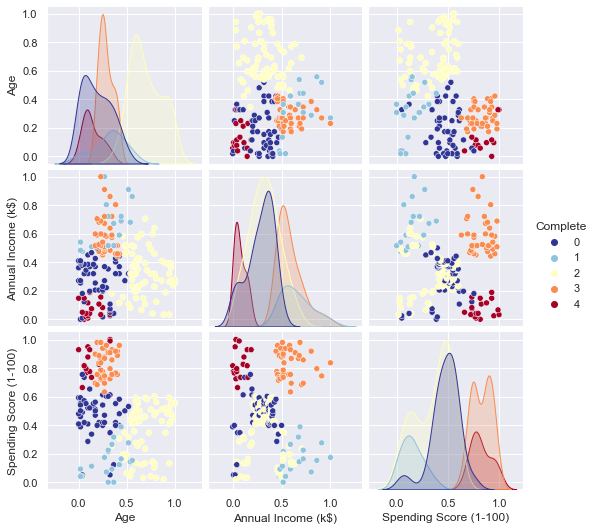

In [160]:
columns=heirarchial_pred[['Age', 'Annual Income (k$)','Spending Score (1-100)','Complete']]
sb.pairplot(columns,hue='Complete',palette='RdYlBu_r')
plt.show()

##### Interpretation :
* By using complete we are getting good results in annual income vs spending score the datas are so clustered.

**Ward**

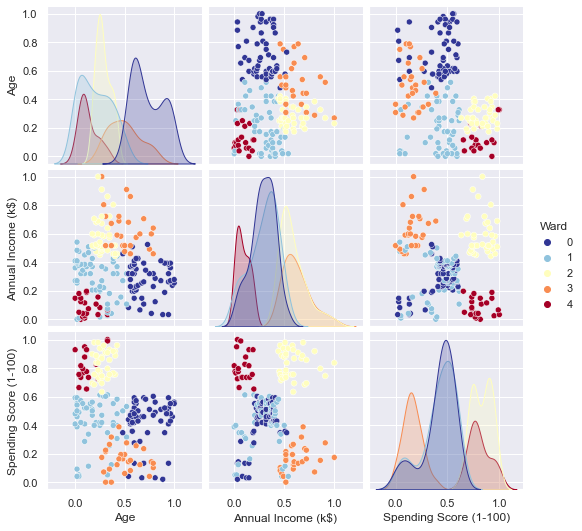

In [161]:
columns=heirarchial_pred[['Age', 'Annual Income (k$)','Spending Score (1-100)','Ward']]
sb.pairplot(columns,hue='Ward',palette='RdYlBu_r')
plt.show()

##### Interpretation :
* Ward having silhouette score than compared to other models.
* The clusters are seperated well than compared to other models but annual income vs spending score the datas are clustered to each other.

##### Conclusion :
* Average and Ward are performing well in forming groups and having good scores.
* Selecting Average method for building best model.

**Agglomerative best model**

In [39]:
# model complete
Agglomerative_model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
Agglomerative_label = Agglomerative_model.fit_predict(X)
Agglomerative_label

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 4, 2, 4, 0, 4, 0, 4, 0, 4,
       2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int64)

In [66]:
Agglomerative_silhouette_avg = silhouette_score(X, Agglomerative_label)
Agglomerative_silhouette_avg 

0.3982883494848387

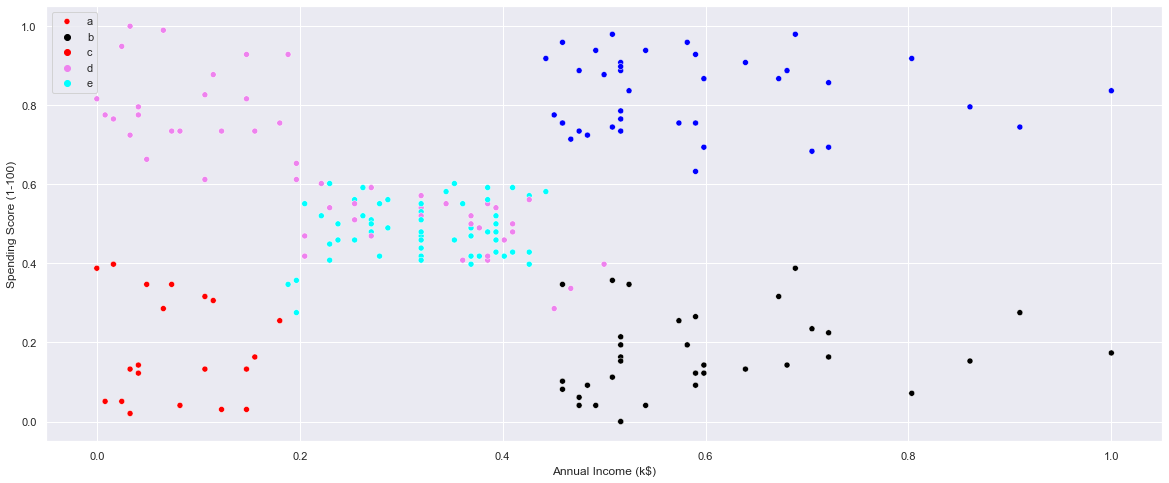

In [181]:
label=['a','b','c','d','e']
color = ['black','red','violet','cyan','blue']
plt.figure(figsize=(20,8))
sb.scatterplot(heirarchial_pred['Annual Income (k$)'],heirarchial_pred['Spending Score (1-100)'],hue=heirarchial_pred['Average'],palette=color)
plt.legend(labels=label)
plt.show()

##### Interpretation :
* These are the clusters we are getting by using 5 and Average linkage method.
* We are getting good cluster formation.

#### DBSCAN

**Selection Epsilon value by using Nearest neighbour method**

In [40]:
# nearest neighbours
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

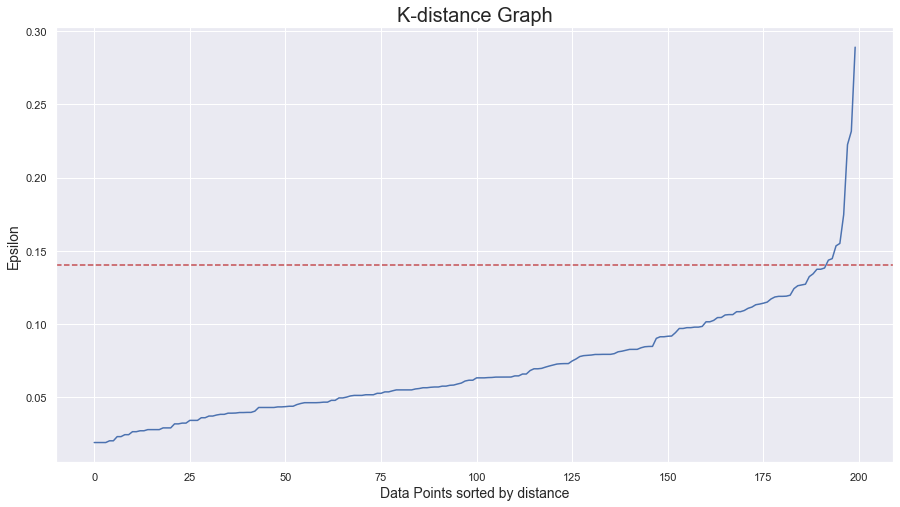

In [41]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.14, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Selection epsilon as 0.14

**Selection min number of samples by using eps=0.14**

In [42]:
eps=0.14
for min_samples in range(5,30):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 0.14 | min_samples=  5 | obtained clustering:  [(1, 38), (2, 106), (3, 4), (4, 5), (5, 34), (6, 13)]
eps= 0.14 | min_samples=  6 | obtained clustering:  [(1, 49), (2, 20), (3, 56), (4, 28), (5, 34), (6, 13)]
eps= 0.14 | min_samples=  7 | obtained clustering:  [(1, 54), (2, 19), (3, 52), (4, 30), (5, 34), (6, 11)]
eps= 0.14 | min_samples=  8 | obtained clustering:  [(1, 59), (2, 19), (3, 50), (4, 30), (5, 34), (6, 8)]
eps= 0.14 | min_samples=  9 | obtained clustering:  [(1, 69), (2, 19), (3, 48), (4, 30), (5, 34)]
eps= 0.14 | min_samples=  10 | obtained clustering:  [(1, 75), (2, 16), (3, 48), (4, 28), (5, 33)]
eps= 0.14 | min_samples=  11 | obtained clustering:  [(1, 79), (2, 14), (3, 30), (4, 28), (5, 17), (6, 32)]
eps= 0.14 | min_samples=  12 | obtained clustering:  [(1, 86), (2, 14), (3, 30), (4, 27), (5, 12), (6, 31)]
eps= 0.14 | min_samples=  13 | obtained clustering:  [(1, 94), (2, 13), (3, 30), (4, 12), (5, 20), (6, 31)]
eps= 0.14 | min_samples=  14 | obtained clustering:  

At 7 we are gitting good results.

**DBSCAN best model**

In [43]:
# using hyperparameter in the DBSCAN
dbscan_opt=DBSCAN(eps=0.14,min_samples=7)
dbscan_pred=dbscan_opt.fit_predict(X)+1

In [44]:
dbscan=X.copy()

In [45]:
# checking the counters of each clusters
dbscan=X.copy()
dbscan['DBSCAN_opt_labels']=dbscan_pred
dbscan['DBSCAN_opt_labels'].value_counts()

0    54
2    52
4    34
3    30
1    19
5    11
Name: DBSCAN_opt_labels, dtype: int64

**Score**

In [67]:
dbscan_silhouette_avg = silhouette_score(X, dbscan_pred)
dbscan_silhouette_avg 

0.25755820133656404

In [46]:
silhouette_score(X, dbscan_pred)

0.25755820133656404

**DBSCAN predicted values**

In [47]:
dbscan

Age  Annual Income (k$)  Spending Score (1-100)  DBSCAN_opt_labels
0    0.019231            0.000000                0.387755                  0
1    0.057692            0.000000                0.816327                  1
2    0.038462            0.008197                0.051020                  0
3    0.096154            0.008197                0.775510                  1
4    0.250000            0.016393                0.397959                  0
..        ...                 ...                     ...                ...
195  0.326923            0.860656                0.795918                  0
196  0.519231            0.909836                0.275510                  0
197  0.269231            0.909836                0.744898                  0
198  0.269231            1.000000                0.173469                  0
199  0.230769            1.000000                0.836735                  0

[200 rows x 4 columns]

**DBSCAN pair plot**

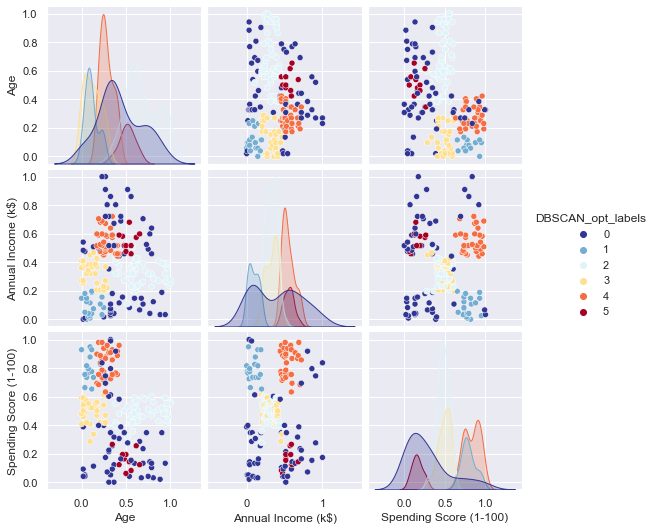

In [256]:
sb.pairplot(dbscan,hue='DBSCAN_opt_labels',palette='RdYlBu_r')
plt.show()

##### Interpretation :
* The scores of the DBSCAN is very low.
* It has given good clusters for some category but for some features the clusters are not formaed well.

### PCA

In [48]:
values_pca = PCA(n_components=2).fit_transform(X) # using the whole data and n=4
values_pca

array([[-0.19222109,  0.31968276],
       [-0.45817502, -0.01815154],
       [ 0.05256189,  0.55185363],
       [-0.40235654, -0.01423909],
       [-0.03164753,  0.15557819],
       [-0.40950435,  0.00685933],
       [ 0.26210486,  0.35572776],
       [-0.52164192, -0.13927039],
       [ 0.6886636 , -0.00272803],
       [-0.26989987, -0.06757168],
       [ 0.65365171, -0.12376123],
       [-0.38890619, -0.33358005],
       [ 0.52058443, -0.01232758],
       [-0.38898994, -0.02524762],
       [ 0.24078454,  0.27858041],
       [-0.43096747, -0.0137903 ],
       [ 0.05868224,  0.142219  ],
       [-0.3681243 ,  0.10946634],
       [ 0.33819651, -0.03569355],
       [-0.38253148, -0.3240246 ],
       [ 0.05821445,  0.14382234],
       [-0.34762958, -0.00658551],
       [ 0.42190532,  0.22227705],
       [-0.26384358, -0.08492897],
       [ 0.47037413,  0.05195093],
       [-0.355278  , -0.12379192],
       [ 0.21848927,  0.03674993],
       [-0.12436878, -0.046899  ],
       [ 0.15538017,

In [49]:
pca=pd.DataFrame(values_pca,columns=['column_1','column_2'])
pca

column_1  column_2
0   -0.192221  0.319683
1   -0.458175 -0.018152
2    0.052562  0.551854
3   -0.402357 -0.014239
4   -0.031648  0.155578
..        ...       ...
195 -0.264686 -0.131248
196  0.231202  0.118796
197 -0.272601 -0.051514
198  0.117597  0.369754
199 -0.365283 -0.086101

[200 rows x 2 columns]

### 1.KMeans

**Elbow Method**

For n_clusters = 2 The average silhouette_score is : 0.47362694075028583
For n_clusters = 3 The average silhouette_score is : 0.4471487905590196
For n_clusters = 4 The average silhouette_score is : 0.43785291876777566
For n_clusters = 5 The average silhouette_score is : 0.4180312341176813
For n_clusters = 6 The average silhouette_score is : 0.4514730359218301
For n_clusters = 7 The average silhouette_score is : 0.4445150117182108
For n_clusters = 8 The average silhouette_score is : 0.4184685279025754
For n_clusters = 9 The average silhouette_score is : 0.41428854508998697
For n_clusters = 10 The average silhouette_score is : 0.42853185903974184
For n_clusters = 11 The average silhouette_score is : 0.42826363764879605
For n_clusters = 12 The average silhouette_score is : 0.41395628753486746
For n_clusters = 13 The average silhouette_score is : 0.41744249194039335
For n_clusters = 14 The average silhouette_score is : 0.39452004284286035


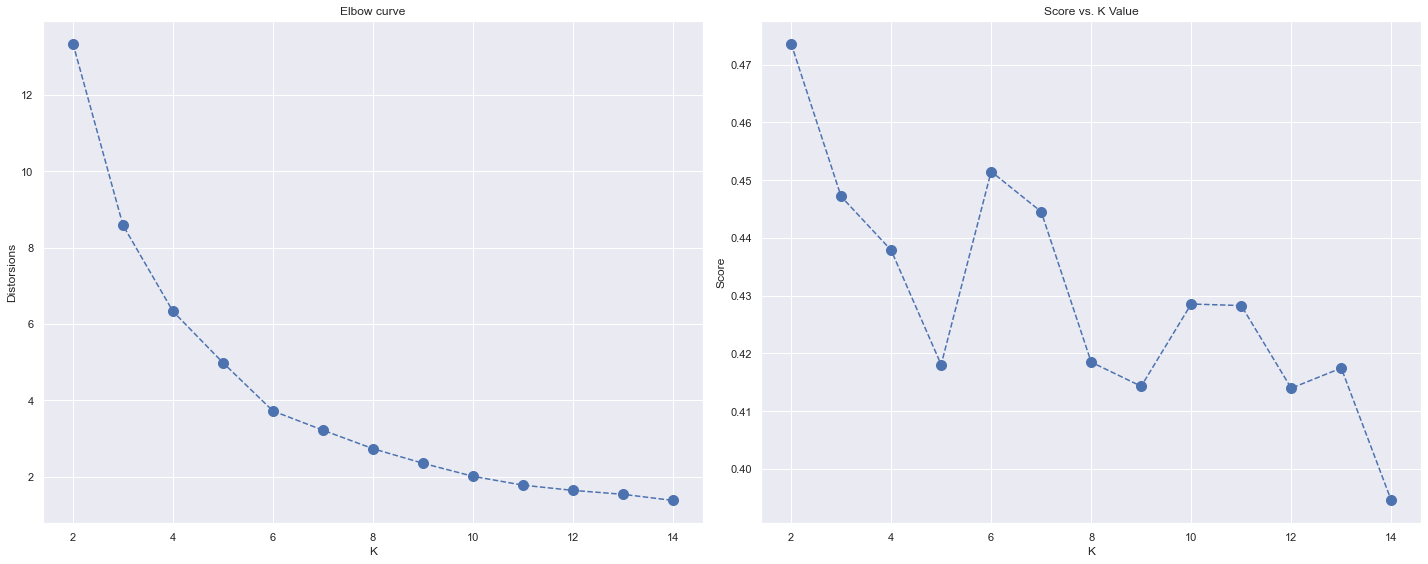

In [50]:
kmeans_best_pca = Kmeans_clusters(values_pca)
kmeans_best_pca

##### Interpretation :
* At 6 in both error and performance we are getting good results.

For n_clusters = 2 The average silhouette_score is : 0.47362694075028583


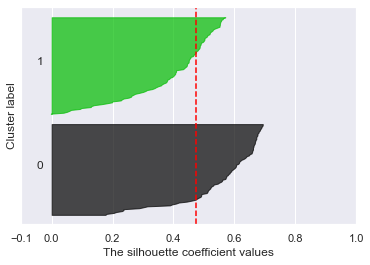

For n_clusters = 3 The average silhouette_score is : 0.4483908275384475


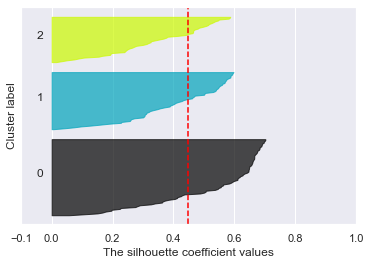

For n_clusters = 4 The average silhouette_score is : 0.43785291876777566


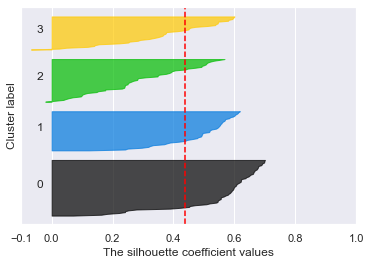

For n_clusters = 5 The average silhouette_score is : 0.4513068048960662


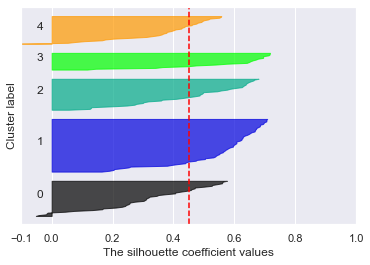

For n_clusters = 6 The average silhouette_score is : 0.45438461699040816


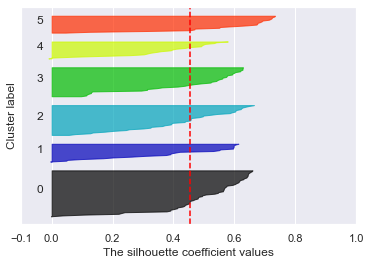

In [51]:
kmean_viz(values_pca)

##### Interpretation :
At 6 the performance is high and we can see there are no negative values from the above graphs.

**Kmeans best model**

In [52]:
# building and training the model
Kmeans_pca = KMeans(n_clusters=6)
kmeans_model_pca = Kmeans_pca.fit(values_pca)

In [53]:
kmeans_label_pca = kmeans_model_pca.labels_
kmeans_label_pca

array([4, 2, 0, 2, 4, 2, 0, 2, 5, 2, 5, 2, 5, 2, 0, 2, 3, 4, 5, 2, 3, 2,
       5, 2, 5, 2, 3, 4, 3, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 1, 2, 3, 4,
       5, 4, 3, 4, 4, 4, 3, 4, 4, 1, 3, 3, 3, 1, 4, 3, 1, 4, 1, 1, 1, 4,
       3, 1, 4, 4, 1, 3, 1, 1, 1, 4, 3, 3, 4, 3, 1, 3, 1, 3, 4, 3, 1, 4,
       4, 3, 1, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 1, 4, 3, 4, 1, 3, 1, 1,
       1, 4, 3, 4, 4, 4, 1, 3, 3, 3, 4, 3, 3, 2, 0, 2, 3, 2, 5, 2, 5, 2,
       4, 2, 0, 2, 5, 2, 0, 2, 5, 2, 4, 2, 0, 2, 3, 2, 0, 2, 5, 2, 5, 2,
       5, 2, 0, 2, 0, 2, 3, 2, 0, 2, 5, 2, 0, 2, 0, 4, 0, 2, 0, 2, 5, 2,
       5, 2, 5, 2, 0, 2, 5, 2, 3, 2, 5, 4, 0, 2, 0, 2, 0, 2, 5, 2, 3, 2,
       0, 2])

In [94]:
kmeans_pca_silhouette_avg = silhouette_score(values_pca, kmeans_label_pca)
kmeans_pca_silhouette_avg

0.45040153839953484

**Predicted**

In [54]:
kmean_pred_pca = pca.copy()
kmean_pred_pca['Kmeans_Labels_pca']=kmeans_label_pca
kmean_pred_pca

column_1  column_2  Kmeans_Labels_pca
0   -0.192221  0.319683                  4
1   -0.458175 -0.018152                  2
2    0.052562  0.551854                  0
3   -0.402357 -0.014239                  2
4   -0.031648  0.155578                  4
..        ...       ...                ...
195 -0.264686 -0.131248                  2
196  0.231202  0.118796                  3
197 -0.272601 -0.051514                  2
198  0.117597  0.369754                  0
199 -0.365283 -0.086101                  2

[200 rows x 3 columns]

**Visualiztion**

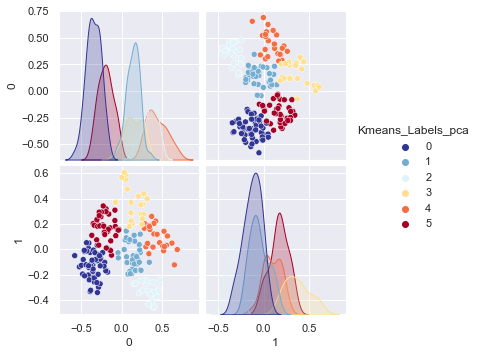

In [272]:
sb.pairplot(kmean_pred_pca,hue='Kmeans_Labels_pca',palette='RdYlBu_r')
plt.show()

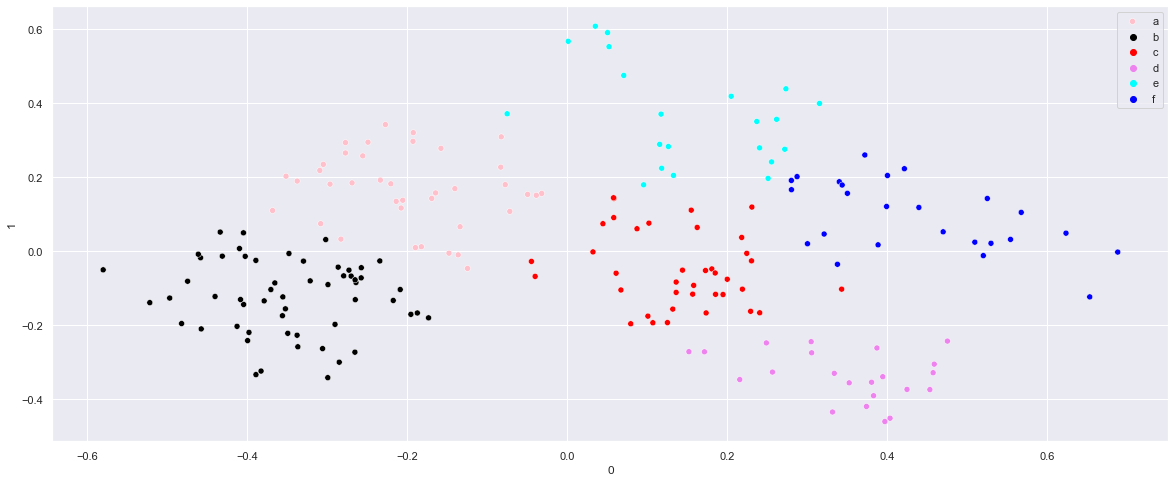

In [280]:
label=['a','b','c','d','e','f']
color = ['black','red','violet','cyan','blue','pink']
plt.figure(figsize=(20,8))
sb.scatterplot(kmean_pred_pca[0],kmean_pred_pca[1],hue=kmean_pred_pca['Kmeans_Labels_pca'],palette=color)
plt.legend(labels=label)
plt.show()

##### Interpretation :
* Kmeans inn pca data it gives very good score and we can see that the clusters are formed very well.
* We can see good seperation of clusters.

### Heirarchichal Clustering

**Dendrogram**

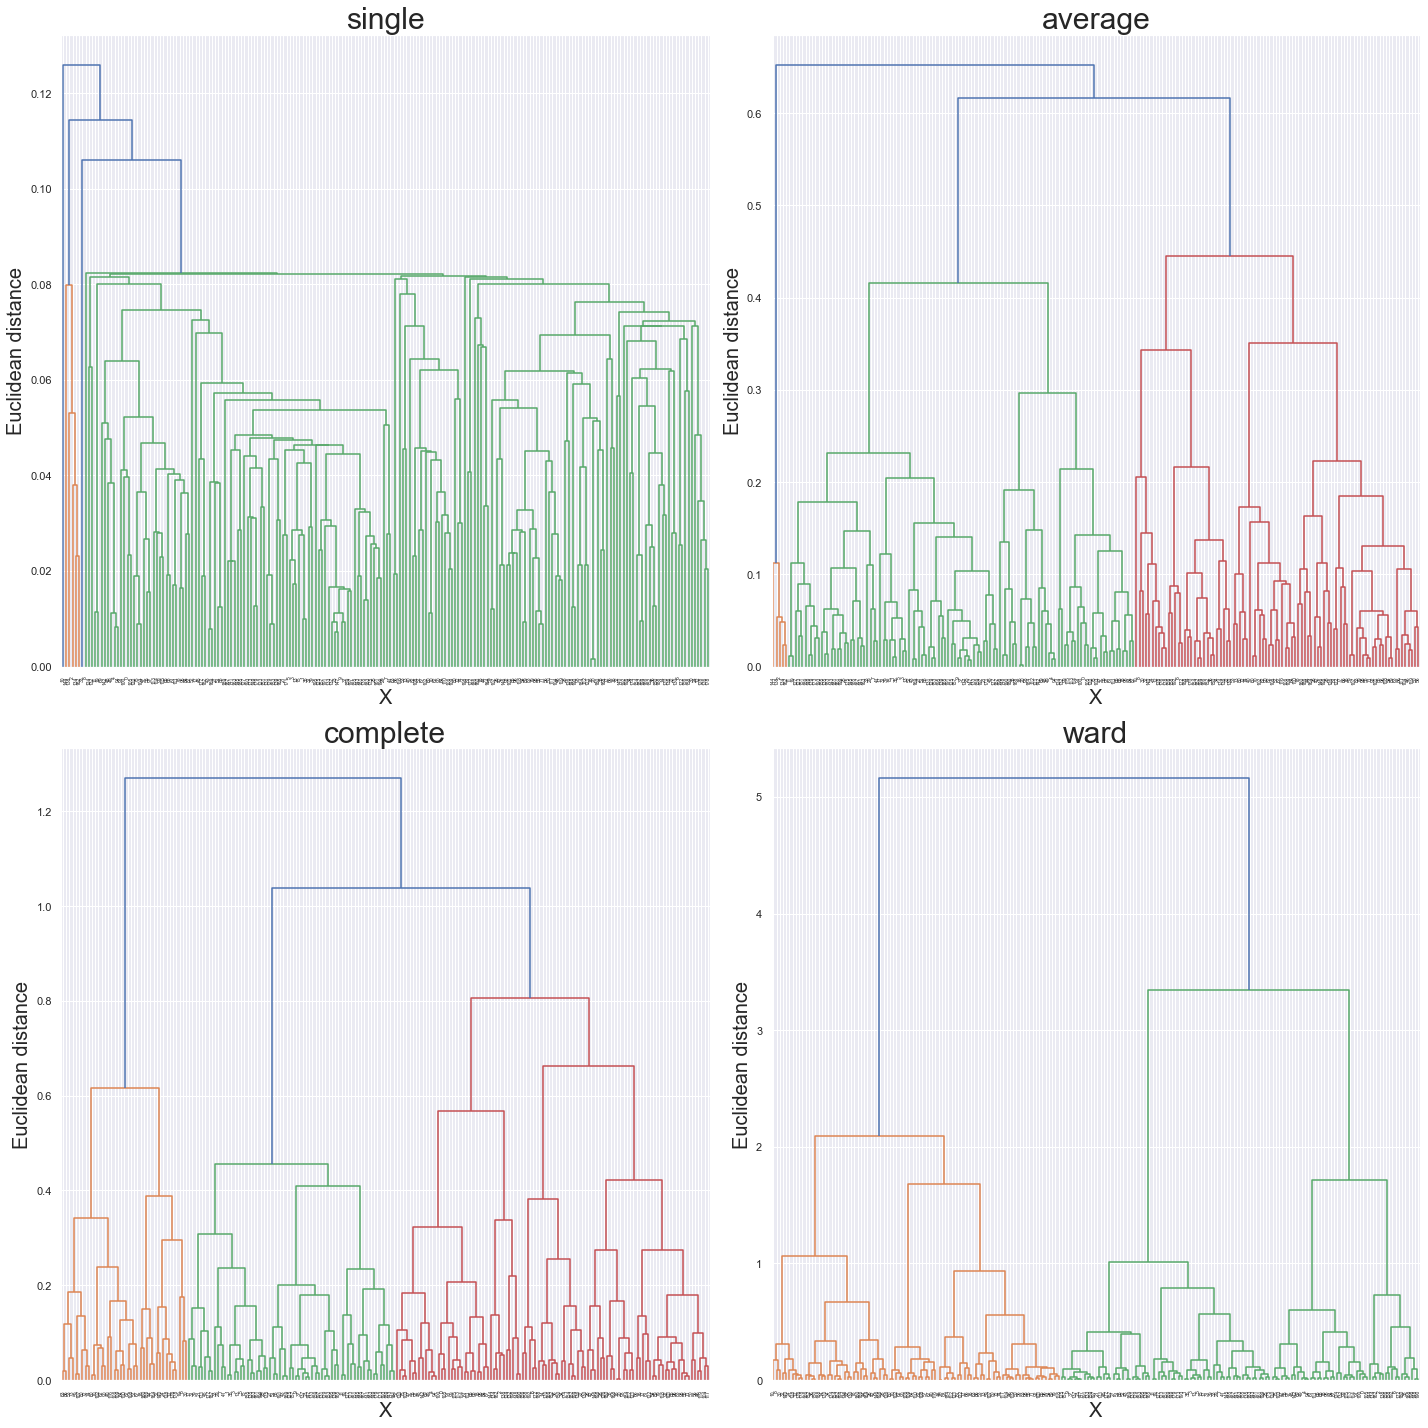

In [55]:
dendo(values_pca)

By bisecting long possible line we are 3 for the clusters.

**Heirarchial model**

In [99]:
heirarchial_pca = heirarchial_clustering(values_pca,3)
heirarchial_pca

single Silhouette Score : 0.07936650793410163
average Silhouette Score : 0.2980532771587329
complete Silhouette Score : 0.25407827847875025
ward Silhouette Score : 0.31412874483182607


Single  Average  Complete  Ward
0         0        2         0     1
1         0        2         2     2
2         2        1         0     1
3         0        2         2     2
4         0        2         0     1
..      ...      ...       ...   ...
195       0        2         2     2
196       0        0         0     0
197       0        2         2     2
198       0        2         0     1
199       0        2         2     2

[200 rows x 4 columns]

**Predicted**

In [80]:
heirarchial_pred_pca = pca.copy()
heirarchial_pred_pca = pd.concat([heirarchial_pred_pca,heirarchial_pca],axis=1)
heirarchial_pred_pca

column_1  column_2  Single  Average  Complete  Ward
0   -0.192221  0.319683       0        2         0     1
1   -0.458175 -0.018152       0        2         2     2
2    0.052562  0.551854       2        1         0     1
3   -0.402357 -0.014239       0        2         2     2
4   -0.031648  0.155578       0        2         0     1
..        ...       ...     ...      ...       ...   ...
195 -0.264686 -0.131248       0        2         2     2
196  0.231202  0.118796       0        0         0     0
197 -0.272601 -0.051514       0        2         2     2
198  0.117597  0.369754       0        2         0     1
199 -0.365283 -0.086101       0        2         2     2

[200 rows x 6 columns]

**Single**

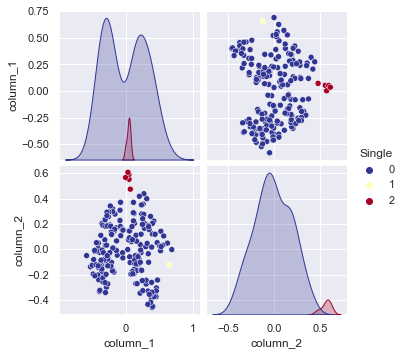

In [81]:
columns=heirarchial_pred_pca[['column_1', 'column_2','Single']]
sb.pairplot(columns,hue='Single',palette='RdYlBu_r',data=heirarchial_pred_pca)
plt.show()

##### Interpretation :
* The clusters are not formed well and the scores are very low

**Average**

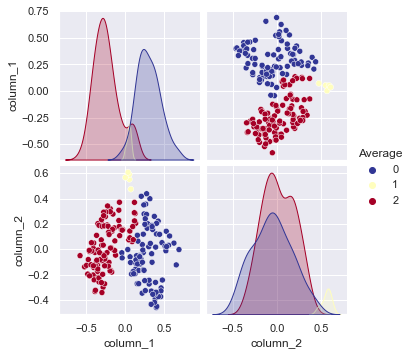

In [82]:
columns=heirarchial_pred_pca[['column_1', 'column_2','Average']]
sb.pairplot(columns,hue='Average',palette='RdYlBu_r',data=heirarchial_pred_pca)
plt.show()

##### Interpretation :
* Clusters are formed well but some of them are merged with other clusters.

**Complete**

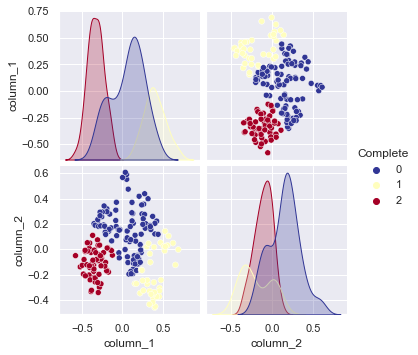

In [83]:
columns=heirarchial_pred_pca[['column_1', 'column_2','Complete']]
sb.pairplot(columns,hue='Complete',palette='RdYlBu_r',data=heirarchial_pred_pca)
plt.show()

##### Interpretation :
* The clusters are formed vey well than compared to average

**Ward**

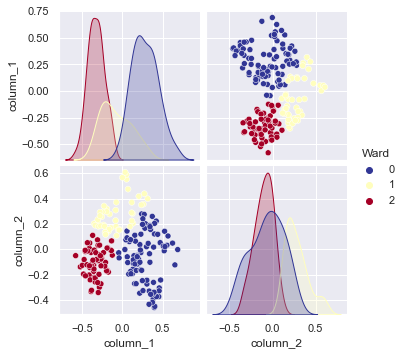

In [84]:
columns=heirarchial_pred_pca[['column_1', 'column_2','Ward']]
sb.pairplot(columns,hue='Ward',palette='RdYlBu_r',data=heirarchial_pred_pca)
plt.show()

In [85]:
# model complete
Agglomerative_model_pca = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
Agglomerative_label_pca = Agglomerative_model_pca.fit_predict(values_pca)
Agglomerative_label_pca

array([2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2], dtype=int64)

In [93]:
Agglomerative_pca_silhouette_avg = silhouette_score(values_pca,heirarchial_pred_pca['Average'])
Agglomerative_pca_silhouette_avg

0.3928546577182262

##### Interpretation :
* When compared to all other models we are getting good results in the ward and the score are good.
* From the grapg we can see the clusters are formed well than compared to other linkage methods.
* So we are selecting ward linkage mmethod for the building the best model.

### DBSCAN

**EPSILON**

In [88]:
# nearest neighbours
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(values_pca)
distances, indices = nbrs.kneighbors(values_pca)

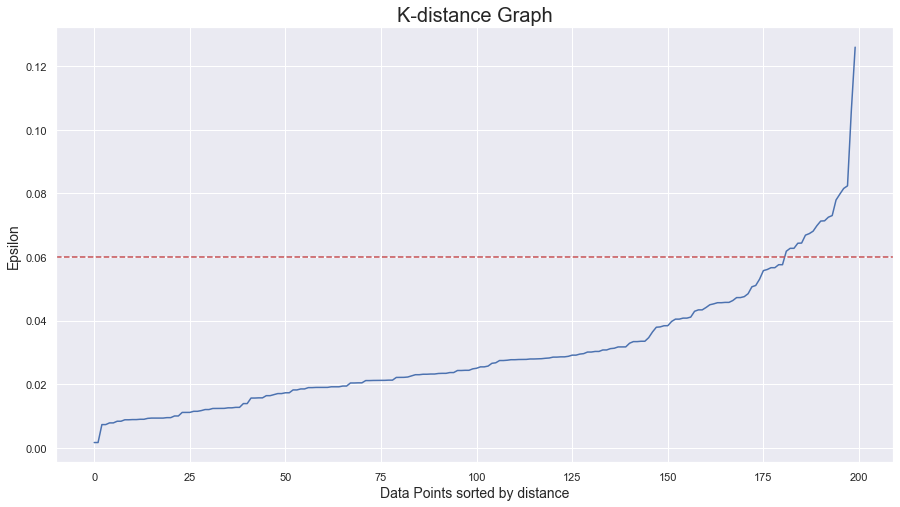

In [89]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.06, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

We are selecting eps=0.06

**Selecting minimum samples**

In [90]:
eps=0.06
for min_samples in range(1,30):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 0.06 | min_samples=  1 | obtained clustering:  [(2, 1), (3, 6), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 2), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 5), (41, 1), (42, 2), (43, 1), (44, 1), (45, 10), (46, 3), (47, 1), (48, 2), (49, 3), (50, 1), (51, 1), (52, 1), (53, 1), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 7), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 3), (67, 1), (68, 7), (69, 3), (70, 3), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 8), (79, 1), (80, 1), (81, 3), (82, 1), (83, 1), (84, 2), (85, 2), (86, 1), (87, 1), (88, 5), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (1

Selecting 4 as minimum samples.

**DBSCAN best models**

In [96]:
# using hyperparameter in the DBSCAN
dbscan_opt_pca=DBSCAN(eps=0.06,min_samples=4)
dbscan_pred_pca=dbscan_opt_pca.fit_predict(X)

In [97]:
silhouette_score(X, dbscan_pred_pca)

-0.30059973700565784

In [63]:
# checking the counters of each clusters
dbscan_pca=pca.copy()
dbscan_pca['DBSCAN_opt_labels_pca']=dbscan_pred_pca
dbscan_pca['DBSCAN_opt_labels_pca'].value_counts()
dbscan_pca

column_1  column_2  DBSCAN_opt_labels_pca
0   -0.192221  0.319683                      0
1   -0.458175 -0.018152                      1
2    0.052562  0.551854                      0
3   -0.402357 -0.014239                      1
4   -0.031648  0.155578                      0
..        ...       ...                    ...
195 -0.264686 -0.131248                      0
196  0.231202  0.118796                      0
197 -0.272601 -0.051514                      0
198  0.117597  0.369754                      0
199 -0.365283 -0.086101                      0

[200 rows x 3 columns]

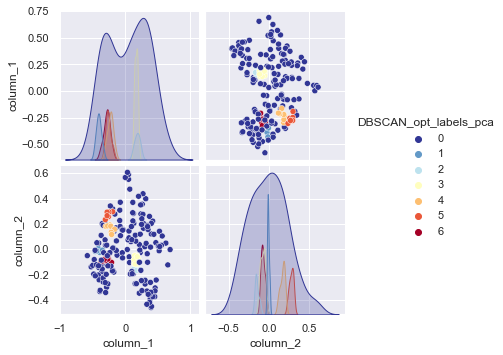

In [311]:
sb.pairplot(dbscan_pca,hue='DBSCAN_opt_labels_pca',palette='RdYlBu_r')
plt.show()

##### Interpretation :
* For PCA data the DBSCAN is not performing well when compared to others.

##### Comparing all the models

In [95]:
comparision = pd.DataFrame({'Data':['Actual','PCA'],'KMeans':[kmeans_silhouette_avg,kmeans_pca_silhouette_avg],'Heirarchial':[Agglomerative_silhouette_avg ,Agglomerative_pca_silhouette_avg],'DBSCAN':[silhouette_score(X, dbscan_pred),silhouette_score(X, dbscan_pred_pca)]})
comparision

Data    KMeans  Heirarchial    DBSCAN
0  Actual  0.406117     0.398288  0.257558
1     PCA  0.450402     0.392855 -0.300600

In [69]:
final=pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
final.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [70]:
final.drop(['CustomerID','Gender'],axis=1,inplace=True)

**Original data and Predicted data**

In [71]:
final['Kmeans']=kmeans_label
final['Heirarchial']=Agglomerative_label
final['DBSCAN']=dbscan_pred

In [72]:
final

Age  Annual Income (k$)  Spending Score (1-100)  Kmeans  Heirarchial  \
0     19                  15                      39       0            1   
1     21                  15                      81       4            2   
2     20                  16                       6       0            1   
3     23                  16                      77       4            2   
4     31                  17                      40       0            1   
..   ...                 ...                     ...     ...          ...   
195   35                 120                      79       2            4   
196   45                 126                      28       1            0   
197   32                 126                      74       2            4   
198   32                 137                      18       1            0   
199   30                 137                      83       2            4   

     DBSCAN  
0         0  
1         1  
2         0  
3         1  
4         0  
..      ...  
195       0  
196       0  
197       0  
198       0  
199       0  

[200 rows x 6 columns]

**PCA data and Predicted data**

In [50]:
final_pca=final.copy()
final_pca.drop(['DBSCAN','Heirarchial','Kmeans'],axis=1,inplace=True)
final_pca['Kmeans']=kmeans_label_pca
final_pca['Heirarchial']=heirarchial_pred_pca['Average']
final_pca['DBSCAN']=dbscan_pca['DBSCAN_opt_labels_pca']

In [51]:
final_pca

Age  Annual Income (k$)  Spending Score (1-100)  Kmeans  Heirarchial  \
0     19                  15                      39       3            0   
1     21                  15                      81       0            1   
2     20                  16                       6       5            0   
3     23                  16                      77       0            1   
4     31                  17                      40       3            0   
..   ...                 ...                     ...     ...          ...   
195   35                 120                      79       0            1   
196   45                 126                      28       1            2   
197   32                 126                      74       0            1   
198   32                 137                      18       5            2   
199   30                 137                      83       0            1   

     DBSCAN  
0         0  
1         1  
2         0  
3         1  
4         0  
..      ...  
195       0  
196       0  
197       0  
198       0  
199       0  

[200 rows x 6 columns]

### Original Data visualiztion

In [392]:
final['Kmeans'].unique()

array([3, 2, 0, 4, 1])

In [395]:
final['Heirarchial'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [419]:
final['DBSCAN'].value_counts()

0    54
2    52
4    34
3    30
1    19
5    11
Name: DBSCAN, dtype: int64

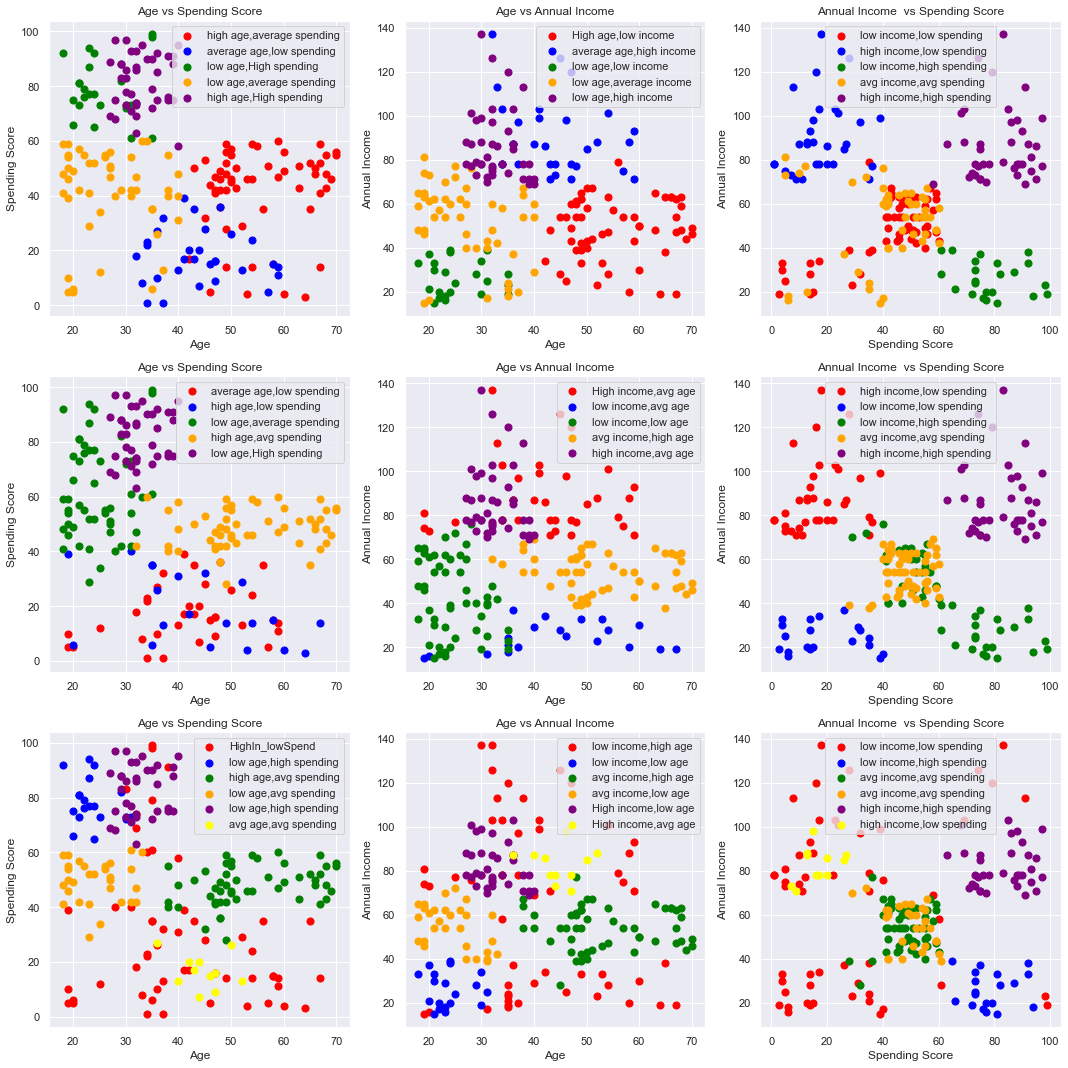

In [408]:
fig,ax = plt.subplots(3,3,figsize = (15,15))

#KMeans
plt.subplot(331)
plt.scatter(final[final.Kmeans == 0]['Age'],final[final.Kmeans == 0]['Spending Score (1-100)'], s = 50, c = 'red', label = 'high age,average spending')
plt.scatter(final[final.Kmeans == 1]['Age'],final[final.Kmeans == 1]['Spending Score (1-100)'], s = 50, c = 'blue', label = 'average age,low spending')
plt.scatter(final[final.Kmeans == 2]['Age'],final[final.Kmeans == 2]['Spending Score (1-100)'], s = 50, c = 'Green', label = 'low age,High spending')
plt.scatter(final[final.Kmeans == 3]['Age'],final[final.Kmeans == 3]['Spending Score (1-100)'], s = 50, c = 'orange', label = 'low age,average spending')
plt.scatter(final[final.Kmeans== 4]['Age'],final[final.Kmeans == 4]['Spending Score (1-100)'], s = 50, c = 'purple', label = 'high age,High spending')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

plt.subplot(332)
plt.scatter(final[final.Kmeans == 0]['Age'],final[final.Kmeans == 0]['Annual Income (k$)'], s = 50, c = 'red', label = 'High age,low income')
plt.scatter(final[final.Kmeans == 1]['Age'],final[final.Kmeans == 1]['Annual Income (k$)'], s = 50, c = 'blue', label = 'average age,high income')
plt.scatter(final[final.Kmeans == 2]['Age'],final[final.Kmeans == 2]['Annual Income (k$)'], s = 50, c = 'Green', label = 'low age,low income')
plt.scatter(final[final.Kmeans == 3]['Age'],final[final.Kmeans == 3]['Annual Income (k$)'], s = 50, c = 'orange', label = 'low age,average income')
plt.scatter(final[final.Kmeans== 4]['Age'],final[final.Kmeans == 4]['Annual Income (k$)'], s = 50, c = 'purple', label = 'low age,high income')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()

plt.subplot(333)
plt.scatter(final[final.Kmeans == 0]['Spending Score (1-100)'],final[final.Kmeans == 0]['Annual Income (k$)'], s = 50, c = 'red', label = 'low income,low spending')
plt.scatter(final[final.Kmeans == 1]['Spending Score (1-100)'],final[final.Kmeans == 1]['Annual Income (k$)'], s = 50, c = 'blue', label = 'high income,low spending')
plt.scatter(final[final.Kmeans == 2]['Spending Score (1-100)'],final[final.Kmeans == 2]['Annual Income (k$)'], s = 50, c = 'Green', label = 'low income,high spending')
plt.scatter(final[final.Kmeans == 3]['Spending Score (1-100)'],final[final.Kmeans == 3]['Annual Income (k$)'], s = 50, c = 'orange', label = 'avg income,avg spending')
plt.scatter(final[final.Kmeans== 4]['Spending Score (1-100)'],final[final.Kmeans == 4]['Annual Income (k$)'], s = 50, c = 'purple', label = 'high income,high spending')
plt.title('Annual Income  vs Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.legend()

# Heirarchical
plt.subplot(334)
plt.scatter(final[final.Heirarchial == 0]['Age'],final[final.Heirarchial == 0]['Spending Score (1-100)'], s = 50, c = 'red', label = 'average age,low spending')
plt.scatter(final[final.Heirarchial == 1]['Age'],final[final.Heirarchial == 1]['Spending Score (1-100)'], s = 50, c = 'blue', label = 'high age,low spending')
plt.scatter(final[final.Heirarchial == 2]['Age'],final[final.Heirarchial == 2]['Spending Score (1-100)'], s = 50, c = 'Green', label = 'low age,average spending')
plt.scatter(final[final.Heirarchial == 3]['Age'],final[final.Heirarchial == 3]['Spending Score (1-100)'], s = 50, c = 'orange', label = 'high age,avg spending')
plt.scatter(final[final.Heirarchial== 4]['Age'],final[final.Heirarchial == 4]['Spending Score (1-100)'], s = 50, c = 'purple', label = 'low age,High spending')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

plt.subplot(335)
plt.scatter(final[final.Heirarchial == 0]['Age'],final[final.Heirarchial == 0]['Annual Income (k$)'], s = 50, c = 'red', label = 'High income,avg age')
plt.scatter(final[final.Heirarchial == 1]['Age'],final[final.Heirarchial == 1]['Annual Income (k$)'], s = 50, c = 'blue', label = 'low income,avg age')
plt.scatter(final[final.Heirarchial == 2]['Age'],final[final.Heirarchial == 2]['Annual Income (k$)'], s = 50, c = 'Green', label = 'low income,low age')
plt.scatter(final[final.Heirarchial == 3]['Age'],final[final.Heirarchial == 3]['Annual Income (k$)'], s = 50, c = 'orange', label = 'avg income,high age')
plt.scatter(final[final.Heirarchial== 4]['Age'],final[final.Heirarchial == 4]['Annual Income (k$)'], s = 50, c = 'purple', label = 'high income,avg age')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()

plt.subplot(336)
plt.scatter(final[final.Heirarchial == 0]['Spending Score (1-100)'],final[final.Heirarchial == 0]['Annual Income (k$)'], s = 50, c = 'red', label = 'high income,low spending')
plt.scatter(final[final.Heirarchial == 1]['Spending Score (1-100)'],final[final.Heirarchial == 1]['Annual Income (k$)'], s = 50, c = 'blue', label = 'low income,low spending')
plt.scatter(final[final.Heirarchial == 2]['Spending Score (1-100)'],final[final.Heirarchial == 2]['Annual Income (k$)'], s = 50, c = 'Green', label = 'low income,high spending')
plt.scatter(final[final.Heirarchial == 3]['Spending Score (1-100)'],final[final.Heirarchial == 3]['Annual Income (k$)'], s = 50, c = 'orange', label = 'avg income,avg spending')
plt.scatter(final[final.Heirarchial == 4]['Spending Score (1-100)'],final[final.Heirarchial == 4]['Annual Income (k$)'], s = 50, c = 'purple', label = 'high income,high spending')
plt.title('Annual Income  vs Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.legend()

#DBSCAN
plt.subplot(337)
plt.scatter(final[final.DBSCAN == 0]['Age'],final[final.DBSCAN == 0]['Spending Score (1-100)'], s = 50, c = 'red', label = 'HighIn_lowSpend')
plt.scatter(final[final.DBSCAN == 1]['Age'],final[final.DBSCAN == 1]['Spending Score (1-100)'], s = 50, c = 'blue', label = 'low age,high spending')
plt.scatter(final[final.DBSCAN == 2]['Age'],final[final.DBSCAN == 2]['Spending Score (1-100)'], s = 50, c = 'Green', label = 'high age,avg spending')
plt.scatter(final[final.DBSCAN == 3]['Age'],final[final.DBSCAN == 3]['Spending Score (1-100)'], s = 50, c = 'orange', label = 'low age,avg spending')
plt.scatter(final[final.DBSCAN== 4]['Age'],final[final.DBSCAN == 4]['Spending Score (1-100)'], s = 50, c = 'purple', label = 'low age,high spending')
plt.scatter(final[final.DBSCAN== 5]['Age'],final[final.DBSCAN == 5]['Spending Score (1-100)'], s = 50, c = 'yellow', label = 'avg age,avg spending')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

plt.subplot(338)
plt.scatter(final[final.DBSCAN == 0]['Age'],final[final.DBSCAN == 0]['Annual Income (k$)'], s = 50, c = 'red', label = 'low income,high age')
plt.scatter(final[final.DBSCAN == 1]['Age'],final[final.DBSCAN == 1]['Annual Income (k$)'], s = 50, c = 'blue', label = 'low income,low age')
plt.scatter(final[final.DBSCAN == 2]['Age'],final[final.DBSCAN == 2]['Annual Income (k$)'], s = 50, c = 'Green', label = 'avg income,high age')
plt.scatter(final[final.DBSCAN == 3]['Age'],final[final.DBSCAN == 3]['Annual Income (k$)'], s = 50, c = 'orange', label = 'avg income,low age')
plt.scatter(final[final.DBSCAN == 4]['Age'],final[final.DBSCAN == 4]['Annual Income (k$)'], s = 50, c = 'purple', label = 'High income,low age')
plt.scatter(final[final.DBSCAN == 5]['Age'],final[final.DBSCAN == 5]['Annual Income (k$)'], s = 50, c = 'yellow', label = 'High income,avg age')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()

plt.subplot(339)
plt.scatter(final[final.DBSCAN == 0]['Spending Score (1-100)'],final[final.DBSCAN == 0]['Annual Income (k$)'], s = 50, c = 'red', label = 'low income,low spending')
plt.scatter(final[final.DBSCAN == 1]['Spending Score (1-100)'],final[final.DBSCAN == 1]['Annual Income (k$)'], s = 50, c = 'blue', label = 'low income,high spending')
plt.scatter(final[final.DBSCAN == 2]['Spending Score (1-100)'],final[final.DBSCAN == 2]['Annual Income (k$)'], s = 50, c = 'Green', label = 'avg income,avg spending')
plt.scatter(final[final.DBSCAN == 3]['Spending Score (1-100)'],final[final.DBSCAN == 3]['Annual Income (k$)'], s = 50, c = 'orange', label = 'avg income,avg spending')
plt.scatter(final[final.DBSCAN == 4]['Spending Score (1-100)'],final[final.DBSCAN == 4]['Annual Income (k$)'], s = 50, c = 'purple', label = 'high income,high spending')
plt.scatter(final[final.DBSCAN == 5]['Spending Score (1-100)'],final[final.DBSCAN == 5]['Annual Income (k$)'], s = 50, c = 'yellow', label = 'high income,low spending')
plt.title('Annual Income  vs Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.legend()

plt.tight_layout()
plt.show()

##### Interpretation :
* The cluster formation for kmeans and agglomerative are good when compaerd to other models.
* I have given labels for each clusters classification and gave seperate color for them.

### PCA Data

In [411]:
final_pca['Kmeans'].unique()


array([5, 0, 3, 4, 1, 2])

In [420]:
final_pca['DBSCAN'].value_counts()


0    159
3     10
6      8
4      7
1      6
5      6
2      4
Name: DBSCAN, dtype: int64

In [413]:
final_pca['Heirarchial'].unique()

array([1, 0, 2], dtype=int64)

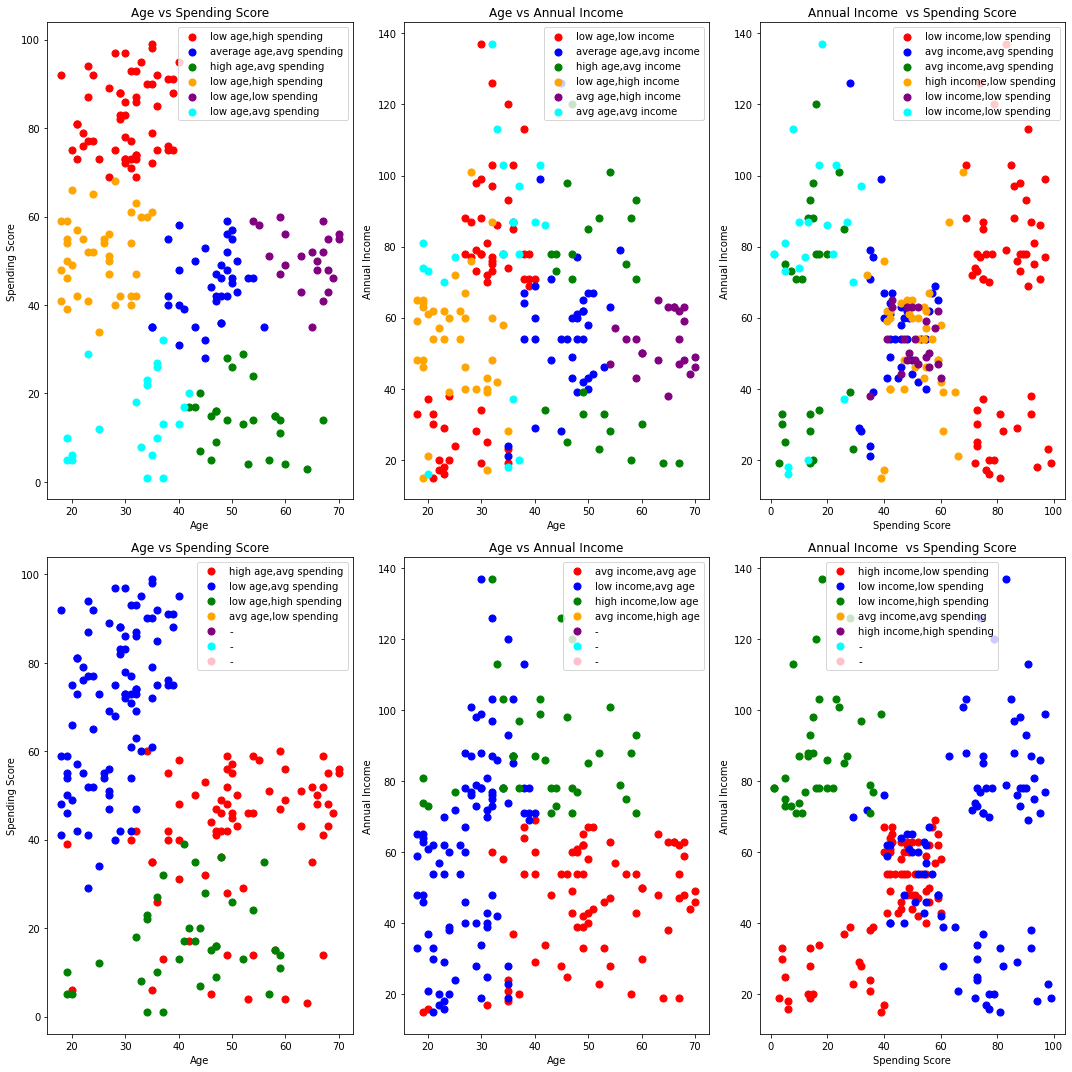

In [52]:
fig,ax = plt.subplots(2,3,figsize = (15,15))

#KMeans
plt.subplot(231)
plt.scatter(final_pca[final_pca.Kmeans == 0]['Age'],final_pca[final_pca.Kmeans == 0]['Spending Score (1-100)'], s = 50, c = 'red', label = 'low age,high spending')
plt.scatter(final_pca[final_pca.Kmeans == 1]['Age'],final_pca[final_pca.Kmeans == 1]['Spending Score (1-100)'], s = 50, c = 'blue', label = 'average age,avg spending')
plt.scatter(final_pca[final_pca.Kmeans == 2]['Age'],final_pca[final_pca.Kmeans == 2]['Spending Score (1-100)'], s = 50, c = 'Green', label = 'high age,avg spending')
plt.scatter(final_pca[final_pca.Kmeans == 3]['Age'],final_pca[final_pca.Kmeans == 3]['Spending Score (1-100)'], s = 50, c = 'orange', label = 'low age,high spending')
plt.scatter(final_pca[final_pca.Kmeans== 4]['Age'],final_pca[final_pca.Kmeans == 4]['Spending Score (1-100)'], s = 50, c = 'purple', label = 'low age,low spending')
plt.scatter(final_pca[final_pca.Kmeans== 5]['Age'],final_pca[final_pca.Kmeans == 5]['Spending Score (1-100)'], s = 50, c = 'cyan', label = 'low age,avg spending')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

plt.subplot(232)
plt.scatter(final_pca[final_pca.Kmeans == 0]['Age'],final_pca[final_pca.Kmeans == 0]['Annual Income (k$)'], s = 50, c = 'red', label = 'low age,low income')
plt.scatter(final_pca[final_pca.Kmeans == 1]['Age'],final_pca[final_pca.Kmeans == 1]['Annual Income (k$)'], s = 50, c = 'blue', label = 'average age,avg income')
plt.scatter(final_pca[final_pca.Kmeans == 2]['Age'],final_pca[final_pca.Kmeans == 2]['Annual Income (k$)'], s = 50, c = 'Green', label = 'high age,avg income')
plt.scatter(final_pca[final_pca.Kmeans == 3]['Age'],final_pca[final_pca.Kmeans == 3]['Annual Income (k$)'], s = 50, c = 'orange', label = 'low age,high income')
plt.scatter(final_pca[final_pca.Kmeans== 4]['Age'],final_pca[final_pca.Kmeans == 4]['Annual Income (k$)'], s = 50, c = 'purple', label = 'avg age,high income')
plt.scatter(final_pca[final_pca.Kmeans== 5]['Age'],final_pca[final_pca.Kmeans == 5]['Annual Income (k$)'], s = 50, c = 'cyan', label = 'avg age,avg income')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()

plt.subplot(233)
plt.scatter(final_pca[final_pca.Kmeans == 0]['Spending Score (1-100)'],final_pca[final_pca.Kmeans == 0]['Annual Income (k$)'], s = 50, c = 'red', label = 'low income,low spending')
plt.scatter(final_pca[final_pca.Kmeans == 1]['Spending Score (1-100)'],final_pca[final_pca.Kmeans == 1]['Annual Income (k$)'], s = 50, c = 'blue', label = 'avg income,avg spending')
plt.scatter(final_pca[final_pca.Kmeans == 2]['Spending Score (1-100)'],final_pca[final_pca.Kmeans == 2]['Annual Income (k$)'], s = 50, c = 'Green', label = 'avg income,avg spending')
plt.scatter(final_pca[final_pca.Kmeans == 3]['Spending Score (1-100)'],final_pca[final_pca.Kmeans == 3]['Annual Income (k$)'], s = 50, c = 'orange', label = 'high income,low spending')
plt.scatter(final_pca[final_pca.Kmeans== 4]['Spending Score (1-100)'],final_pca[final_pca.Kmeans == 4]['Annual Income (k$)'], s = 50, c = 'purple', label = 'low income,low spending')
plt.scatter(final_pca[final_pca.Kmeans== 5]['Spending Score (1-100)'],final_pca[final_pca.Kmeans == 5]['Annual Income (k$)'], s = 50, c = 'cyan', label = 'low income,low spending')
plt.title('Annual Income  vs Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.legend()

# Heirarchical
plt.subplot(234)
plt.scatter(final_pca[final_pca.Heirarchial == 0]['Age'],final_pca[final_pca.Heirarchial == 0]['Spending Score (1-100)'], s = 50, c = 'red', label = 'high age,avg spending')
plt.scatter(final_pca[final_pca.Heirarchial == 1]['Age'],final_pca[final_pca.Heirarchial == 1]['Spending Score (1-100)'], s = 50, c = 'blue', label = 'low age,avg spending')
plt.scatter(final_pca[final_pca.Heirarchial == 2]['Age'],final_pca[final_pca.Heirarchial == 2]['Spending Score (1-100)'], s = 50, c = 'Green', label = 'low age,high spending')
plt.scatter(final_pca[final_pca.Heirarchial == 3]['Age'],final_pca[final_pca.Heirarchial == 3]['Spending Score (1-100)'], s = 50, c = 'orange', label = 'avg age,low spending')
plt.scatter(final_pca[final_pca.Heirarchial== 4]['Age'],final_pca[final_pca.Heirarchial == 4]['Spending Score (1-100)'], s = 50, c = 'purple', label = '-')
plt.scatter(final_pca[final_pca.Heirarchial == 5]['Age'],final_pca[final_pca.Heirarchial == 5]['Spending Score (1-100)'], s = 50, c = 'cyan', label = '-')
plt.scatter(final_pca[final_pca.Heirarchial == 6]['Age'],final_pca[final_pca.Heirarchial == 6]['Spending Score (1-100)'], s = 50, c = 'pink', label = '-')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

plt.subplot(235)
plt.scatter(final_pca[final_pca.Heirarchial == 0]['Age'],final_pca[final_pca.Heirarchial == 0]['Annual Income (k$)'], s = 50, c = 'red', label = 'avg income,avg age')
plt.scatter(final_pca[final_pca.Heirarchial == 1]['Age'],final_pca[final_pca.Heirarchial == 1]['Annual Income (k$)'], s = 50, c = 'blue', label = 'low income,avg age')
plt.scatter(final_pca[final_pca.Heirarchial == 2]['Age'],final_pca[final_pca.Heirarchial == 2]['Annual Income (k$)'], s = 50, c = 'Green', label = 'high income,low age')
plt.scatter(final_pca[final_pca.Heirarchial == 3]['Age'],final_pca[final_pca.Heirarchial == 3]['Annual Income (k$)'], s = 50, c = 'orange', label = 'avg income,high age')
plt.scatter(final_pca[final_pca.Heirarchial== 4]['Age'],final_pca[final_pca.Heirarchial == 4]['Annual Income (k$)'], s = 50, c = 'purple', label = '-')
plt.scatter(final_pca[final_pca.Heirarchial== 5]['Age'],final_pca[final_pca.Heirarchial == 5]['Annual Income (k$)'], s = 50, c = 'cyan', label = '-')
plt.scatter(final_pca[final_pca.Heirarchial== 6]['Age'],final_pca[final_pca.Heirarchial == 6]['Annual Income (k$)'], s = 50, c = 'pink', label = '-')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()

plt.subplot(236)
plt.scatter(final_pca[final_pca.Heirarchial == 0]['Spending Score (1-100)'],final_pca[final_pca.Heirarchial == 0]['Annual Income (k$)'], s = 50, c = 'red', label = 'high income,low spending')
plt.scatter(final_pca[final_pca.Heirarchial == 1]['Spending Score (1-100)'],final_pca[final_pca.Heirarchial == 1]['Annual Income (k$)'], s = 50, c = 'blue', label = 'low income,low spending')
plt.scatter(final_pca[final_pca.Heirarchial == 2]['Spending Score (1-100)'],final_pca[final_pca.Heirarchial == 2]['Annual Income (k$)'], s = 50, c = 'Green', label = 'low income,high spending')
plt.scatter(final_pca[final_pca.Heirarchial == 3]['Spending Score (1-100)'],final_pca[final_pca.Heirarchial == 3]['Annual Income (k$)'], s = 50, c = 'orange', label = 'avg income,avg spending')
plt.scatter(final_pca[final_pca.Heirarchial == 4]['Spending Score (1-100)'],final_pca[final_pca.Heirarchial == 4]['Annual Income (k$)'], s = 50, c = 'purple', label = 'high income,high spending')
plt.scatter(final_pca[final_pca.Heirarchial == 5]['Spending Score (1-100)'],final_pca[final_pca.Heirarchial == 5]['Annual Income (k$)'], s = 50, c = 'cyan', label = '-')
plt.scatter(final_pca[final_pca.Heirarchial == 6]['Spending Score (1-100)'],final_pca[final_pca.Heirarchial == 6]['Annual Income (k$)'], s = 50, c = 'pink', label = '-')
plt.title('Annual Income  vs Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.legend()


plt.tight_layout()
plt.show()

##### Interpretation :
* DBSCAN has not gave good results so we are not using it for the visualization .
* For PCA data KMeans has the highest silhouette score than caompared to any other model.
* From the graph we can see that for different combinations of features we  are getting good clusters.

### Conclusion :

For this data we are getting good results at KMeans their score are normal data = 0.4061,pca data = 0.4543.

So we are using KMeans predictions for the labels and the labels are given by using the cluster formation from the scatter plots.

* **These are customers category formed by the model.**

If Kmeans 0 = These are the customers with high age,average spending,low income,low spending.

If Kmeans 1 = These are the customers with average age,low spending,high income.

If Kmeans 2 = These are the customers with low age,High spending,low income.

If Kmeans 3 = These are the customers with low age,average spending,average income.

If Kmeans 4 = These are the customers with high age,High spending,low age,high income,high spending'

*From this clusters ,we can taget the customers at the cluster 3 and 4 , because they are very low age and earning more but their spending is less.*


**Normal data**
* For the normal data we are getting good performance in Kmeans = 0.4061 and Agglomerative = 0.3982.
* DBSCAN not performed well as much as expected. Their score is 0.2575.

**PCA data**
* For PCA data also both KMeans and Agglomerative are performing well and their score are 0.4543 and 0.3485 respectively.
* For DBSCAN scan the score are very low.

So for this data ***KMeans model*** performing well than compared to any other models.
